## Investigating the open loop characteristics of decoders

First the preamble..

In [20]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import sys
import pandas as pd
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm

# add current path to system PATH 
sys.path.insert(0,'/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaceDataAnalysis')

# Import user defined libraries
import DataExtraction.extractRawData as dataExtractor
from BasicAnalytics import targetAcqusitionPlotting as targetPlotter
from BasicAnalytics import variabilityAnalysis 
from BasicAnalytics import plottingFuncs as pf
from DecoderFunctions import decoderTrainingFunctions as decoder

blueColor = (11/255, 201/255, 205/255)
redColor = (214/255, 50/255, 48/255)
orangeColor = (242/255, 197/255, 124/255)
poshBlackColor = (114/255, 9/255, 183/255)
from tol_colors import tol_cmap, tol_cset

import numpy as np
import matplotlib.pyplot as plt


# # Using seaborn's style
# plt.style.use('seaborn')
# width = 345

tex_fonts = {

    "text.usetex": True,
    "font.family": "serif",

    "axes.labelsize": 12,
    "font.size": 12,

    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}

plt.rcParams.update(tex_fonts)

Move to the correct directory 

In [21]:
os.chdir("/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaceDataAnalysis")

# Define save game location
saveGameLocation = "ExperimentRuns" + "/P5_Katsu_28_02" + "/P5_Katsu_28_02__12_00"

Retrieve the identifiers for each participant

In [22]:
# Retrieve identifiers for each participant
decoderNum2Letter = {0: 'E', 1: 'F', 2: 'G', 
                3:'H', 4: 'I', 5: 'J', 6: 'K'
}
# Get arbitrary training files
participantIdentifiers = dataExtractor.extractSpecificParticipantFiles(trialType = "_training1")
noParticipants = len(participantIdentifiers)
noDecoders = 7
K = 5 # number of folds in K folds
# Remove training part off each file
for i in range(len(participantIdentifiers)):
    participantIdentifiers[i] = participantIdentifiers[i].replace("_training1", "")



This code calculates the decoder data for each participant for each decoder, using a K Folds of 5

In [23]:
# # Define the total number of iterations
# total_iterations = noDecoders * noParticipants * K

# R2Vals = np.zeros((noDecoders,noParticipants,K))
# listOfDecoderDicts = []
# with tqdm(total=total_iterations, desc="Running K folds model training across all decoders and participants") as pbar:
#     # Iterate across all decoders, participants and folds 
#     for decoderIdx in tqdm(range(noDecoders)):
#         for participantIdx in range(noParticipants):
#             for KIdx in range(K):

#                 decoderLetter = decoderNum2Letter[decoderIdx]
#                 #print(decoderLetter)
#                 # Find metric
                 #infoDict = decoder.fitModelToData(mode = 'RigidBodiesSet' + decoderLetter,tester = 'ridge', \
#                     compPca = None, savePath=participantIdentifiers[participantIdx],colorMap=decoder.colorMap,plot=False,DOFOffset= 0.1,ignoreTargetMotionTimesLessThan=0, kFolds = KIdx+1,participantNo = participantIdx)

#                 R2Vals[decoderIdx, participantIdx, KIdx] = infoDict['Score']

#                 listOfDecoderDicts.append(infoDict)

#                 # Update the progress bar
#                 pbar.update(1)

In [24]:
# # Define the total number of iterations
# total_iterations = noParticipants * K

# predictionPower = np.zeros((noParticipants,K,20))

# with tqdm(total=total_iterations, desc="Running K folds predictive power calcualtion across all participants") as pbar:
#     # Iterate across all decoders, participants and folds 
#     for participantIdx in range(noParticipants):
#         for KIdx in range(K):

#             # Find predictive power
#             predictionPower[participantIdx,KIdx,:] = decoder.fitModelToEachLimb(\
#                 compPca = None, savePath=participantIdentifiers[participantIdx],colorMap=decoder.colorMap,plot=False,DOFOffset= 0.1,ignoreTargetMotionTimesLessThan=0, kFolds = KIdx+1,participantNo = participantIdx,dummyDecoder=True)

#             # Update the progress bar
#             pbar.update(1)

In [25]:
# predictionPower.shape
# predictionPowerAvged = np.average(predictionPower,axis = 1)
# predictionPowerAvged.shape
# predictionPowerAvged[:,-1]

In [26]:
# Plot coefficients
# Calculate variability statistic of training data


# Now plot bar plot with errors bars need to check the code below

# Define necessary variables
# x =  range(0, 19)

# labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
#     'LFA', 'LHD', 'RSD', 'RUA', 'RFA', 'RHD',  'LTH', 'LSN', 
#     'LFT', 'RTH', 'RSN', 'RFT']

# cmap = tol_cset('vibrant')
# colors = [cmap[0],cmap[0],cmap[0],cmap[0],cmap[0],
#           cmap[1],cmap[1],cmap[1],cmap[1],
#           cmap[2],cmap[2],cmap[2],cmap[2],
#           cmap[3],cmap[3],cmap[3],cmap[3],cmap[3],cmap[3], 
# ]


# fig = plt.figure(figsize = (13.5,4))
# ax = plt.gca()
# pf.createErrorBarPlot(predictionPowerAvged[:,:19],xLabel = "Limb", yLabel = r"$\Delta R^2$",
# xTicks = x, xTickLabels = labels, ax = ax, barColor = colors,offsetLabel=True,plotTopErrorOnly = True,plotSEM = True,offsetTicks = True)

# # pf.createBoxPlot(ax,listOfVars = predictionPowerAvged,xTickList = labels, colorList = colors)
# # ax.set_xticks(range(19),labels = labels, rotation=45)  # Rotate x-axis labels for better visibility

# # Add lines to below
# labelHeight = -0.3
# height2 = 0.05
# addLines = True

# # Add grouping lines
# if addLines:
#     labelSize = 19
#     plt.axhline(y=labelHeight, xmin=0.03, xmax=0.24, color=cmap[0], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

#     # Adding a label for the group
#     plt.text(2, labelHeight - height2, 'Upper central', ha='center', va='top', color=cmap[0], fontsize=labelSize, fontweight = "bold")

    # plt.axhline(y=labelHeight, xmin=0.293, xmax=0.45, color=cmap[1], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # # Adding a label for the group
    # plt.text(6.5, labelHeight - height2, 'Upper left', ha='center', va='top', color=cmap[1], fontsize=labelSize, fontweight = "bold")

    # plt.axhline(y=labelHeight, xmin=0.503, xmax=0.66, color=cmap[2], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # # Adding a label for the group
    # plt.text(10.5, labelHeight - height2, 'Upper right', ha='center', va='top', color=cmap[2], fontsize=labelSize, fontweight = "bold")

    # plt.axhline(y=labelHeight, xmin=0.712, xmax=0.974, color=cmap[3], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # # Adding a label for the group
    # plt.text(15.5, labelHeight - height2, 'Lower', ha='center', va='top', color=cmap[3], fontsize=labelSize, fontweight = "bold")

#     # Set limits if necessary to make room for group labels
#     plt.ylim(bottom=-0.0)  # Lower the y-limit to make space for the text
#     plt.xlim(-0.6,18.5)
# #plt.ylim(-0.5,1)

# label = ax.xaxis.label
# # Get the current position of the label, which is in axis coordinates
# current_position = label.get_position()
# # Set new xpos of the label
# label.set_position((0.5, -0.5))

# # Remove grid backgrounds
# plt.grid(False)

# pf.defaultPlottingConfiguration(ax,maxYTicks=3)
# plt.savefig("2.predictivePower.pdf",bbox_inches='tight')

This code allows the dicts to be saved and exported instead of the above step to save time

In [27]:
# with open('DecoderAnalysis/RidgeDecoderR2Data.pkl', 'wb') as file:
#     pickle.dump(R2Vals, file)

# # DATA HAS BEEN SAVED
# with open('DecoderAnalysis/RidgeDecoderData.pkl', 'wb') as file:
#     pickle.dump(listOfDecoderDicts, file)


with open('DecoderAnalysis/DecoderR2Data.pkl', 'rb') as file:
    R2ValsLinear = pickle.load(file)

with open('DecoderAnalysis/DecoderData.pkl', 'rb') as file:
    listOfDecoderDictsLinear = pickle.load(file)

with open('DecoderAnalysis/RidgeDecoderR2Data.pkl', 'rb') as file:
    R2ValsRidge = pickle.load(file)

with open('DecoderAnalysis/RidgeDecoderData.pkl', 'rb') as file:
    listOfDecoderDictsRidge= pickle.load(file)


Here we plot the R2 values for linear and ridge models, the median k fold is taken for each participant decoder, with the error bars showing variance across participants

In [28]:
R2Vals_KfoldsAggLinear = np.median(R2ValsLinear,axis = 2).reshape(7,-1)

R2Vals_KfoldsAggRidge = np.median(R2ValsRidge,axis = 2).reshape(7,-1)

First plot for linear models

(-2.0, 2.0)

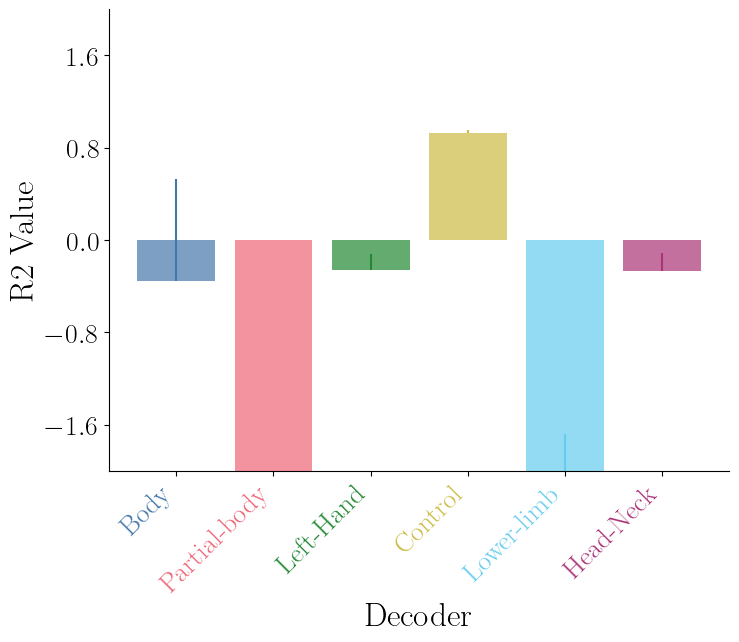

In [29]:


# We pl
decoderLabels = ['Body','Partial-body','Left-Hand','Control','Lower-limb','Head-Neck','Random']
# Define necessary variables
x =  range(0, 6)


cmap = tol_cset('bright')
colors = cmap[0:6]

fig = plt.figure(figsize = (8,6))
ax = plt.gca()

pf.createErrorBarPlot(R2Vals_KfoldsAggLinear[:6,:].T,xLabel = "Decoder", yLabel = "R2 Value",
xTicks = x, xTickLabels = decoderLabels[:6], ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5)
# plt.yscale('log')
plt.ylim(-2,2)

Now plot for Ridge

(-2.0, 2.0)

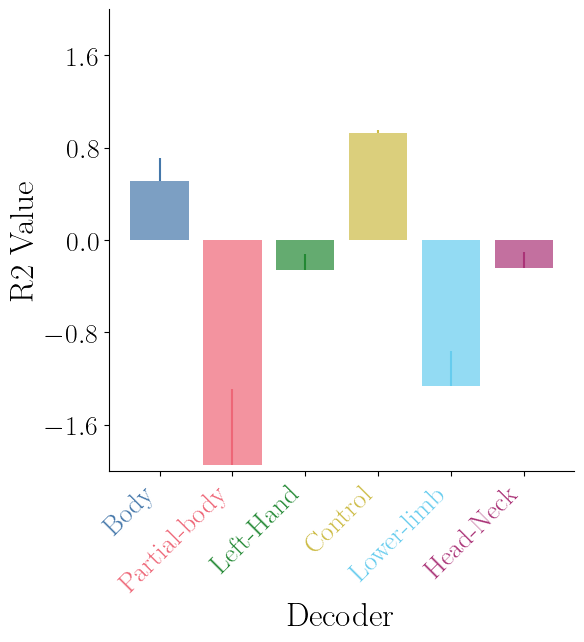

In [30]:


# Now plot bar plot with errors bars need to check the code below

# Define necessary variables
x =  range(0, 6)


cmap = tol_cset('bright')
colors = cmap[0:6]

fig = plt.figure(figsize = (6,6))
ax = plt.gca()

pf.createErrorBarPlot(R2Vals_KfoldsAggRidge[:6,:].T,xLabel = "Decoder", yLabel = "R2 Value",
xTicks = x, xTickLabels = decoderLabels[:6], ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5)
# plt.yscale('log')
plt.ylim(-2,2)

Now we do the same for the angular accuracies 

In [31]:
# Find angular accuracies
angularAccuraciesLinear = np.zeros((noDecoders,noParticipants,K))
angularAccuraciesRidge = np.zeros((noDecoders,noParticipants,K))
magnitudesLinear = np.zeros((noDecoders,noParticipants,K))
magnitudesRidge = np.zeros((noDecoders,noParticipants,K))
i,j,k = 0,0,0
for linearDict in listOfDecoderDictsLinear:
    #print(i,j,k)
    angularAccuraciesLinear[i,j,k] = linearDict['Angular Accuracy']
    magnitudesLinear[i,j,k] = linearDict['Mag Accuracy']
    k += 1
    if k // 5 == 1:
        k = 0
        j += 1
    
    if j // 11 == 1:
        j = 0
        i += 1
i,j,k = 0,0,0
for ridgeDict in listOfDecoderDictsRidge:
    #print(i,j,k)
    angularAccuraciesRidge[i,j,k] = ridgeDict['Angular Accuracy']
    magnitudesRidge[i,j,k] = ridgeDict['Mag Accuracy']
    k += 1
    if k // 5 == 1:
        k = 0
        j += 1
    
    if j // 11 == 1:
        j = 0
        i += 1

angAccsAvgedLinear= np.average(angularAccuraciesLinear,axis = 2).reshape(7,-1)
angAccsAvgedRidge= np.average(angularAccuraciesRidge,axis = 2).reshape(7,-1)
avgedMagRidge= np.average(magnitudesRidge,axis = 2).reshape(7,-1)
avgedMagLinear= np.average(magnitudesLinear,axis = 2).reshape(7,-1)

['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']


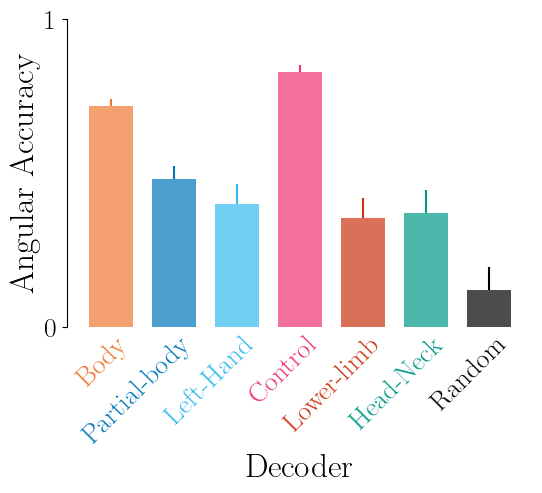

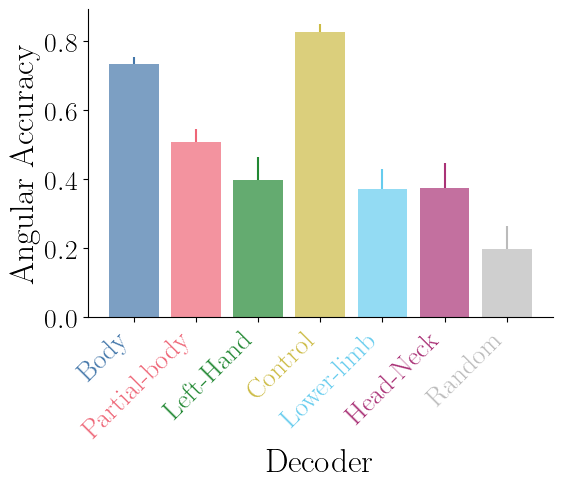

In [93]:


# Now plot bar plot with errors bars need to check the code below

# Define necessary variables





fig = plt.figure(figsize = (6,4))
ax = plt.gca()

def plotAngAccs(ax):

    cmap = tol_cset('vibrant')
    colors = list(cmap[0:7])
    print(colors)
    colors[6] = '#000000'

    x =  range(0, 7)
    pf.createErrorBarPlot(angAccsAvgedLinear[:7,:].T,xLabel = "Decoder", yLabel = "Angular Accuracy",
    xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors,rot = 45,width = -0.7,align = "edge")
    pf.defaultPlottingConfiguration(ax,maxYTicks = 2,removeXTick=True)
    ax.set_xticklabels(ax.get_xticks(), fontweight='bold')
    # plt.yscale('log')
    # plt.ylim(-2,2)
    ax.set_yticks([0,1],labels = [0,1])
    ax.set_xticks(x,labels = decoderLabels, rotation=45, ha = 'right')  
    
plotAngAccs(ax)
plt.show()
# Define necessary variables
x =  range(0, 7)


cmap = tol_cset('bright')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(angAccsAvgedRidge[:7,:].T,xLabel = "Decoder", yLabel = "Angular Accuracy",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5)
# plt.yscale('log')
# plt.ylim(-2,2)

Now we do the same for magnitude accuracies

['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']


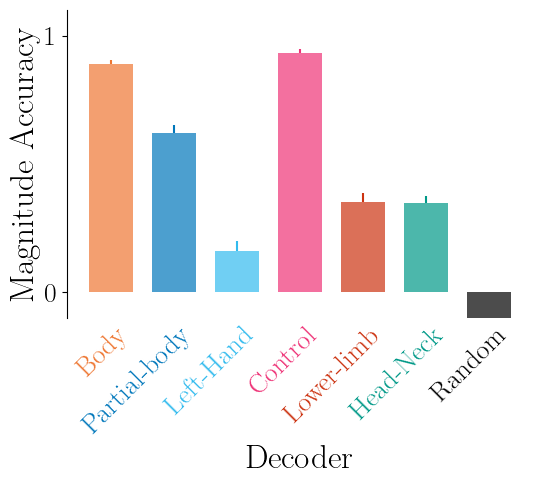

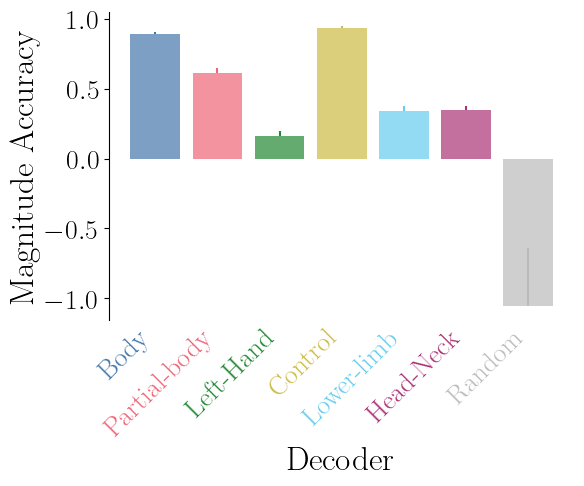

In [33]:


# Now plot bar plot with errors bars need to check the code below

# Define necessary variables





fig = plt.figure(figsize = (6,4))
ax = plt.gca()

def plotMagVals(ax):

    cmap = tol_cset('vibrant')
    colors = list(cmap[0:7])
    print(colors)
    colors[6] = '#000000'

    x =  range(0, 7)

    pf.createErrorBarPlot(avgedMagLinear[:,:].T,xLabel = "Decoder", yLabel = "Magnitude Accuracy",
    xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors,rot = 45,width = -0.7,align = 'edge')
    pf.defaultPlottingConfiguration(ax,maxYTicks = 2,removeXTick=True)
    ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
    # plt.yscale('log')
    plt.ylim(-0.1,1.1)

    ax.set_yticks([0,1],labels = [0,1]) 
plotMagVals(ax)
plt.show()
# Define necessary variables
x =  range(0, 7)


cmap = tol_cset('bright')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(avgedMagRidge[:7,:].T,xLabel = "Decoder", yLabel = "Magnitude Accuracy",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5,removeXTick=True)
# plt.yscale('log')
# plt.ylim(-2,2)

Next plot the adjusted R2 Value

In [34]:
# Fetch decoder data
from sklearn.metrics import r2_score
from DecoderFunctions.decoderTrainingFunctions import processTrialData, colorMap
from matplotlib.gridspec import GridSpec
def plotTrajectories(decoder,k,split,decoderType = None,plottingOn = False):
    cmap_ = [cmap[3],cmap[0],cmap[1]]
    """This function takes in a decoder dict object which is outputted from the fitModelToData function
    It then generates plots of the actual test trajectories (ground truth) against test trajectories predicted
    from the model.

    It also returns an adjusted r2 score, where in each trajectory, the difference between the predicted trajectory
    and actual trajectory start point has been subtracted from the predicted trajectory. This R2 score
    better reflects the model performance decoding a user's movement from a known start position.

    Inputs:
        @param: decoder - A dict object specifying properties of the decoder gathered 
        from the fitModelToData function
        @param k - A int specifying how many trajectories to plot, must be less or equal to the total number of trajectories
        @param split: the trial that is the test [0,1,2,3,4]
        @param decoderType - Char/String specifying decoder type for saved, if none then plots are not saved

    """
    # Extract true and predicted cursor positions for all test data
    Y_pred = np.zeros(decoder['PredCursorPos'].shape)
    correctY = np.zeros(decoder['TestCursorPos'].shape)
    Y_pred_ = decoder['PredCursorPos']
    correctY_ = decoder['TestCursorPos']

    # In pygame y axis is inverted so this is accounted for by mapping normalised y pos from 0 - 1 to 1 - 0
    correctY[:,1] = 1  - correctY_[:,1] 
    Y_pred[:,1] = 1 - Y_pred_[:,1] 
    correctY[:,0] = correctY_[:,0]
    Y_pred[:,0] = Y_pred_[:,0]

    actualPos = []
    predPos = []
    
    # Retrieve test go cue data
    mapSplitToTerm = { 0: "_test", 1: "_training1", 2: "_training2", 3: "_training3", 4: "_training4"

    }
    
    identifierTrial = mapSplitToTerm[split]
    rigidBodies1, cursorPos1,cursorVel1,goCues1,targetHits1,timeStamps1, minDof1,maxDof1,c,failedTargetAppearTimes = processTrialData(participantIdentifiers[0] + identifierTrial,0.01)# make this test 
    if plottingOn:
        fig = plt.figure(figsize=(12,4))
        gs = GridSpec(1, 3, figure=fig, width_ratios=[0.49,0.02, 0.49], height_ratios=[1])
        ax0 = fig.add_subplot(gs[0, 0])
        
    #print("Plotting trajectories without compensating for offset")

    # Gather each trajectory
    for i in range(0,len(goCues1)-1):
        plotFrom = goCues1[i]
        plotUntil = targetHits1[i]

        # Upload trajectory path to list for future stage
        actualPos.append(correctY[plotFrom:plotUntil])
        predPos.append(Y_pred[plotFrom:plotUntil])

        # plot first k trajectories
        if plottingOn:
            if i in [0,7,8]:
                if i < k:
                    ax0.plot(correctY[plotFrom:plotUntil,0],correctY[plotFrom:plotUntil,1],color = cmap_[i%len(cmap_)])
                    ax0.plot(Y_pred[plotFrom:plotUntil,0],Y_pred[plotFrom:plotUntil,1], "--",color = cmap_[i%len(cmap_)])
                    
                    # Plot start and end markers (for i = 0 this in addition gives a label in the legend )
                    if i == 0:
                        ax0.plot([],[],color = 'k',label = "Ground Truth Trajectory")
                        ax0.plot([],[], "--", color = 'k',label="Predicted Trajectory")
                        ax0.scatter(correctY[plotFrom,0], correctY[plotFrom,1],s=250, marker=".", color = 'g',label = 'Actual cursor start position')
                        # plt.scatter(correctY[plotUntil,0], correctY[plotUntil,1], s=100, marker="D", color = 'g')
                        ax0.scatter(Y_pred[plotFrom,0], Y_pred[plotFrom,1],s=250, marker=".", color = 'r',label = 'Estimated cursor start position')
                        # plt.scatter(Y_pred[plotUntil,0], Y_pred[plotUntil,1], s=60, marker="D", color = 'r')
                    else:
                        ax0.scatter(correctY[plotFrom,0], correctY[plotFrom,1],s=250, marker=".", color = 'g')
                        # plt.scatter(correctY[plotUntil,0], correctY[plotUntil,1], s=100, marker="D", color = 'g')
                        ax0.scatter(Y_pred[plotFrom,0], Y_pred[plotFrom,1],s=250, marker=".", color = 'r')
                        # plt.scatter(Y_pred[plotUntil,0], Y_pred[plotUntil,1], s=60, marker="D", color = 'r')
    if plottingOn:
        # Remove top and right spines for the first plot
        ax0.spines['top'].set_visible(False)
        ax0.spines['right'].set_visible(False)

        # Set plotting configuration
        ax0.set_xlabel(r'$X_{pos}$',fontsize = 25,fontweight='bold')
        ax0.set_ylabel(r'$Y_{pos}$', fontsize = 25,fontweight='bold')
        ax0.set_xticks([0,1],fontsize = 15)
        ax0.set_yticks([0,1],fontsize = 15)
        ax0.text(-0.3, 1.3, 'A)', ha='center', va='top', fontsize=30, fontweight = "bold")
        #plt.title('Trajectories showing actual and estimated cursor position for each target aquisition performed in test set. \n Each trajectory is shown in a different colour and position estimates are derived from set (b) of rigid bodies',fontsize = 15)
        
        pf.defaultPlottingConfiguration(ax0)
        ax0.legend(loc="lower right",fontsize=50,prop={'weight': 'bold', 'size': 15})
        # Save the file if necessary
        if decoderType is not None:
            #plt.savefig(saveGameLocation + "_Decoder {} trajectories_noOffset".format(decoderType))
            ax1 = fig.add_subplot(gs[0, 2])

        #print("Plotting trajectories  compensating for offset")
    for i in range(0,len(goCues1)-1): # len(goCues1) len(colorMap)
        plotFrom = goCues1[i]
        plotUntil = targetHits1[i]
        # if np.sqrt(np.square(correctY[plotUntil,0] - correctY[plotFrom,0]) + np.square(correctY[plotUntil,1] - correctY[plotFrom,1])) < 0.15:
        #     break

        offset = Y_pred[plotFrom] - correctY[plotFrom]
        Y_pred[plotFrom:plotUntil] = Y_pred[plotFrom:plotUntil] - offset

        if plottingOn:
            if i in [0,7,8]:
                if i == 0:
                    ax1.plot([],[],color = 'k',label = "Ground Truth Trajectory")
                    ax1.plot([],[], "--", color = 'k',label="Predicted Trajectory")
                    ax1.scatter([], [],s=250, marker=".", color = 'b',label = 'Cursor Start Position')
                    ax1.plot(correctY[plotFrom:plotUntil,0],correctY[plotFrom:plotUntil,1],color = cmap_[i%len(cmap_)])
                    ax1.plot(Y_pred[plotFrom:plotUntil,0],Y_pred[plotFrom:plotUntil,1], "--", color = cmap_[i%len(cmap_)])
                    ax1.scatter(correctY[plotFrom,0], correctY[plotFrom,1],s=250, marker=".", color = 'b')
                elif i < k+1:
                    ax1.plot(correctY[plotFrom:plotUntil,0],correctY[plotFrom:plotUntil,1],color = cmap_[i%len(cmap_)])
                    ax1.plot(Y_pred[plotFrom:plotUntil,0],Y_pred[plotFrom:plotUntil,1], "--",color = cmap_[i%len(cmap_)])
                    #if i == 0:
                        #plt.scatter(correctY[plotFrom,0], correctY[plotFrom,1],s=250, marker=".", color = 'b',label = 'Cursor start position')
                        # plt.scatter(correctY[plotUntil,0], correctY[plotUntil,1], s=100, marker="D", color = 'g')
                        #plt.scatter(Y_pred[plotFrom,0], Y_pred[plotFrom,1],s=250, marker=".", color = 'r',label = 'Estimated cursor start position')
                        # plt.scatter(Y_pred[plotUntil,0], Y_pred[plotUntil,1], s=60, marker="D", color = 'r')
                    #else:
                    ax1.scatter(correctY[plotFrom,0], correctY[plotFrom,1],s=250, marker=".", color = 'b')
                    # plt.scatter(correctY[plotUntil,0], correctY[plotUntil,1], s=100, marker="D", color = 'g')
                    #plt.scatter(Y_pred[plotFrom,0], Y_pred[plotFrom,1],s=250, marker=".", color = 'r')
                    # plt.scatter(Y_pred[plotUntil,0], Y_pred[plotUntil,1], s=60, marker="D", color = 'r')

    if plottingOn:
        ax1.set_xlabel(r'$X_{pos}$',fontsize = 20)
        ax1.set_ylabel(r'$Y_{pos}$',fontsize = 20)
        #plt.title('Trajectories showing actual and estimated cursor position for each target aquisition performed in test set. \n Each trajectory is shown in a different colour and position estimates are derived from set (b) of rigid bodies',fontsize = 15)
        
        ax1.set_xticks([0,1],fontsize = 15)
        ax1.set_yticks([0,1],fontsize = 15)

        pf.defaultPlottingConfiguration(ax1)
        ax1.legend(loc="lower right",fontsize=50,prop={'weight': 'bold', 'size': 15})
        ax1.text(-0.1, 1.3, 'B)', ha='center', va='top', fontsize=30, fontweight = "bold")
        # Remove top and right spines for the first plot
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)

        # Save the file if necessary
        if decoderType is not None:
            #plt.savefig("DecoderF-example-offsetsuitability.pdf",bbox_inches='tight')
            #plt.savefig(saveGameLocation + "_Decoder {} trajectories_withOffset.svg".format(decoderType))
            plt.show()

    # then subtract mean
    allPredPosX = []
    allPredPosY = []
    allTruePosX = []
    allTruePosY = []
    r2AdjTrajVals = []
    r2TrajVals_ = []
    for idx in range(len(actualPos)-1):
        truePosTrajectory = actualPos[idx]
        predPosTrajectory = predPos[idx]
        # plt.plot(truePosTrajectory[:,0],truePosTrajectory[:,1])
        # plt.plot(predPosTrajectory[:,0],predPosTrajectory[:,1])
        # plt.show()
        dist = calcDist(truePosTrajectory[0,:],truePosTrajectory[-1,:])
        #print(dist)
        if dist > 500:
            r2TrajectoryScore = float(r2_score(truePosTrajectory, predPosTrajectory))
            #print(r2TrajectoryScore)
            r2TrajVals_.append(r2TrajectoryScore)
        offset = predPosTrajectory[0] - truePosTrajectory[0]
        predPosTrajectory = predPosTrajectory - offset
        if dist > 500:
            r2TrajectoryScoreAdj = float(r2_score(truePosTrajectory, predPosTrajectory))
            r2AdjTrajVals.append(r2TrajectoryScoreAdj)
        for val in truePosTrajectory:
            allTruePosX.append(val[0])
            allTruePosY.append(val[1])
        for val in predPosTrajectory:
            allPredPosX.append(val[0])
            allPredPosY.append(val[1])

    pos_true = np.zeros((len(allTruePosX),2))
    pos_pred = np.zeros(pos_true.shape)
    pos_true[:,0] = allTruePosX
    pos_true[:,1] = allTruePosY
    pos_pred[:,0] = allPredPosX
    pos_pred[:,1] = allPredPosY
    r2Score = r2_score(pos_true, pos_pred) # this is adj r2
    #print("R2 val for this decoder: {}".format(r2Score))

    #return pos_true, pos_pred, r2Score, r2TrajVals_, r2AdjTrajVals
    return r2Score


def calcDist(startPos,endPos):
    ranges = [1100+800,800+225]
    return np.sqrt(np.sum([ (ranges[i] * (endPos[i] - startPos[i])) ** 2 for i in range(len(startPos))]))





In [35]:
r2AdjValsLinear = np.zeros((noDecoders,noParticipants,K))
r2AdjValsRidge = np.zeros((noDecoders,noParticipants,K))
i,j,k = 0,0,0
for linearDict in tqdm(listOfDecoderDictsLinear):
    #print(i,j,k)
    r2AdjValsLinear[i,j,k] = plotTrajectories(linearDict,15,k,decoderNum2Letter[i])

    k += 1
    if k // 5 == 1:
        k = 0
        j += 1
    
    if j // 11 == 1:
        j = 0
        i += 1

i,j,k = 0,0,0
for ridgeDict in tqdm(listOfDecoderDictsRidge):
    #print(i,j,k)
    r2AdjValsRidge[i,j,k] = plotTrajectories(ridgeDict,15,k,decoderNum2Letter[i])
    k += 1
    if k // 5 == 1:
        k = 0
        j += 1
    
    if j // 11 == 1:
        j = 0
        i += 1



# truePosDecoderE,predPosDecoderE,r2ValAdjDecoderE,r2TrajsE,r2TrajsAdjE = plotTrajectories(listOfDecoderDictsLinear[0],15,0,'E')
# # now need to get true data

  0%|          | 0/385 [00:00<?, ?it/s]

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


100%|██████████| 385/385 [01:57<00:00,  3.27it/s]


ExperimentRuns/P5_Katsu_28_02/P5_Katsu_28_02__12_00


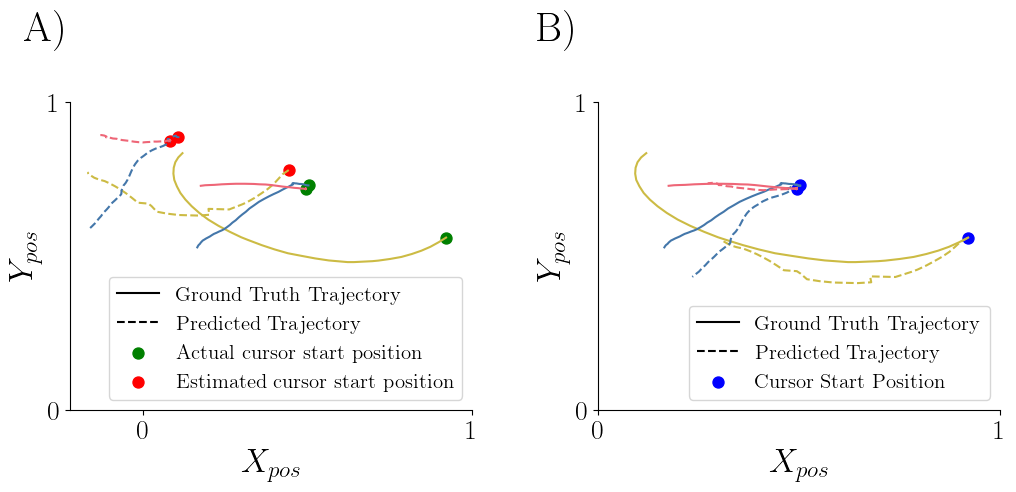

0.796955913404986

In [36]:
# iterated through decoders, participants and folds
# choose an f decoder , each decoder has 55 points
print(participantIdentifiers[4])

infoDict = decoder.fitModelToData(mode = 'RigidBodiesSetF',tester = 'linear',
                   compPca = None, savePath=participantIdentifiers[4],colorMap=decoder.colorMap,plot=False,DOFOffset= 0.1,ignoreTargetMotionTimesLessThan=0, kFolds = 5)

plotTrajectories(decoder = infoDict ,
                 k = 18,
                 split = 4,
                 decoderType= "F",
                 plottingOn = True)


['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']


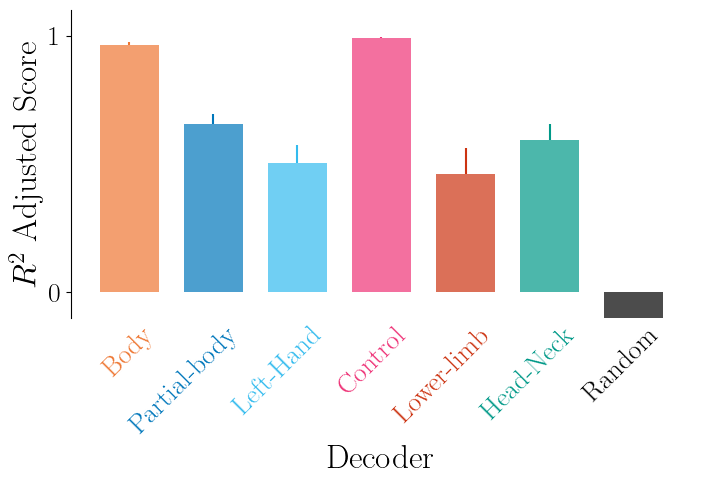

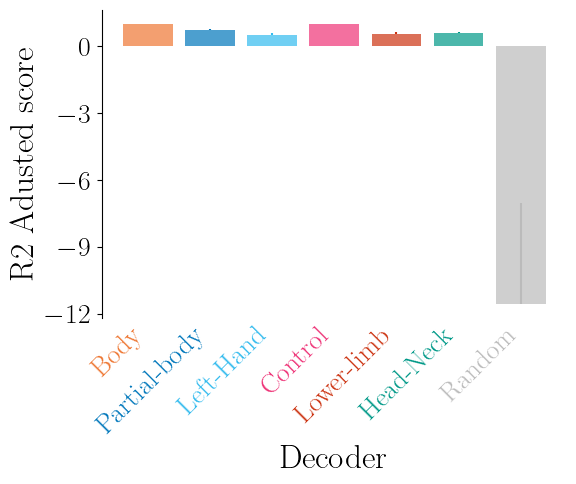

In [94]:
# Now show this on an error plot
fig = plt.figure(figsize = (8,4))
ax = plt.gca()



r2AdjValsLinearAvged = np.average(r2AdjValsLinear,axis = 2).reshape(7,-1)
r2AdjValsRidgeAvged = np.average(r2AdjValsRidge,axis = 2).reshape(7,-1)
def plotR2AdjVals(ax):
    # Now plot bar plot with errors bars need to check the code below


    # Define necessary variables
    x =  range(0, 7)


    cmap = tol_cset('vibrant')
    colors = list(cmap[0:7])
    print(colors)
    colors[6] = '#000000'

    pf.createErrorBarPlot(r2AdjValsLinearAvged[:,:].T,xLabel = "Decoder", yLabel = r"$R^2$ Adjusted Score",
    xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors,rot = 45,width = -0.7,align='edge',colorTicks = True)
    pf.defaultPlottingConfiguration(ax,maxYTicks = 2,removeXTick=True)
    ax.set_xticklabels(ax.get_xticklabels(), fontweight='heavy')
    ax.set_yticks([0,1],labels = [0,1]) 

    # for xtick, color in zip(ax.get_xticklabels(), colors):
    #     xtick.set_color(color)


    # plt.yscale('log')
    ax.set_ylim(-0.1,1.1)
plotR2AdjVals(ax)
plt.show()
# Define necessary variables
x =  range(0, 7)


cmap = tol_cset('vibrant')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(r2AdjValsRidgeAvged[:7,:].T,xLabel = "Decoder", yLabel = "R2 Adusted score",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5,removeXTick=True)
# plt.yscale('log')
# plt.ylim(-2,2)

Plot all basic acc metrics

['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']
['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']
['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/2896895392.py:16: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/2896895392.py:16: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/2896895392.py:16: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later



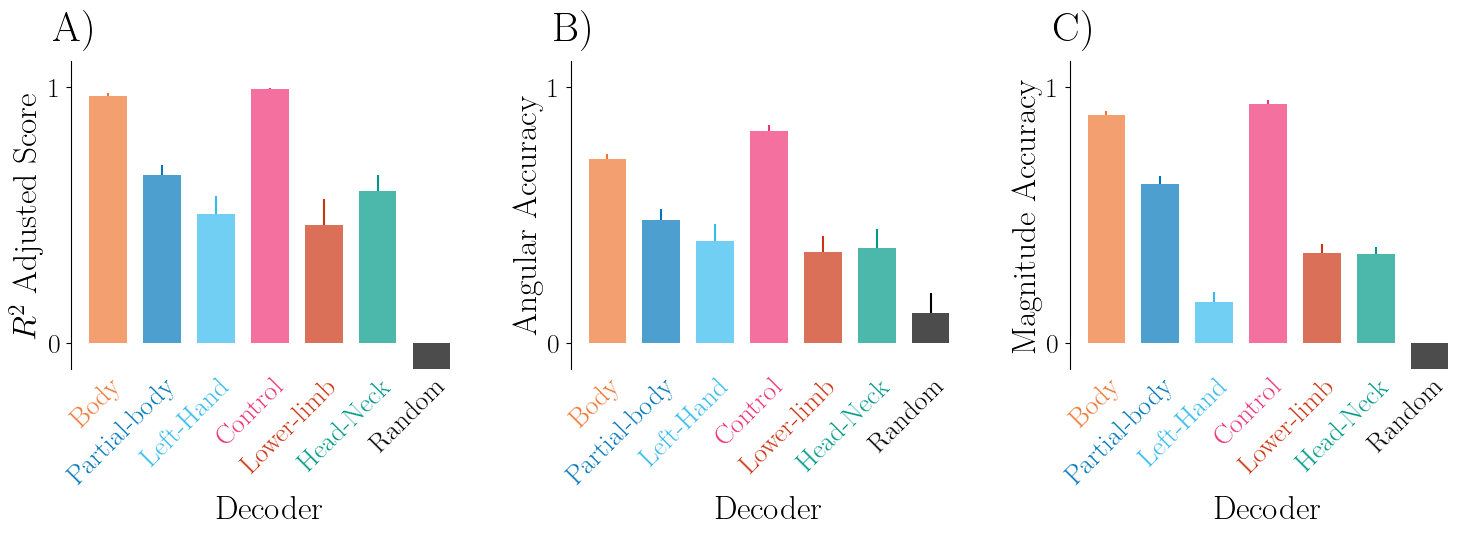

In [95]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize = (18,4))
gs = GridSpec(1,5,figure=fig,width_ratios=[0.33,0.005,0.33,0.005,0.33])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[0, 4])

plotR2AdjVals(ax0)
ax0.text(-1.0, 1.3, 'A)', ha='center', va='top', fontsize=30, fontweight = "bold")
plotAngAccs(ax1)
ax1.text(-0.95, 1.3, 'B)', ha='center', va='top', fontsize=30, fontweight = "bold")
ax1.set_ylim(-0.1,1.1)
plotMagVals(ax2)
ax2.text(-0.95, 1.3, 'C)', ha='center', va='top', fontsize=30, fontweight = "bold")
plt.savefig("2.1-DecoderOpenMetrics-acc.pdf",bbox_inches = "tight")




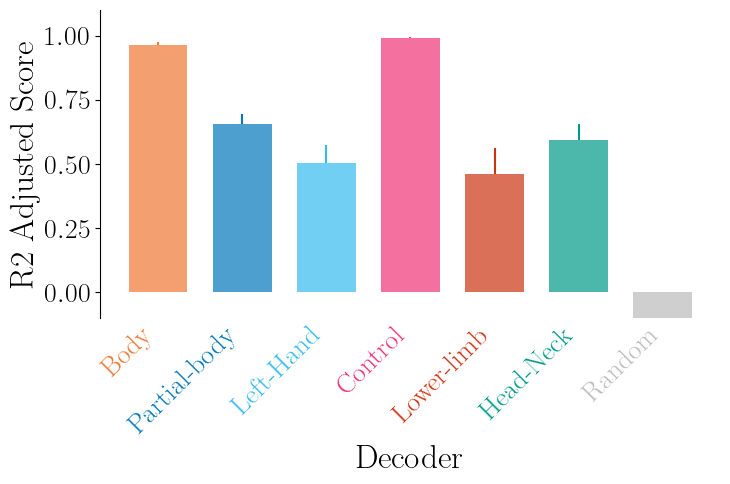

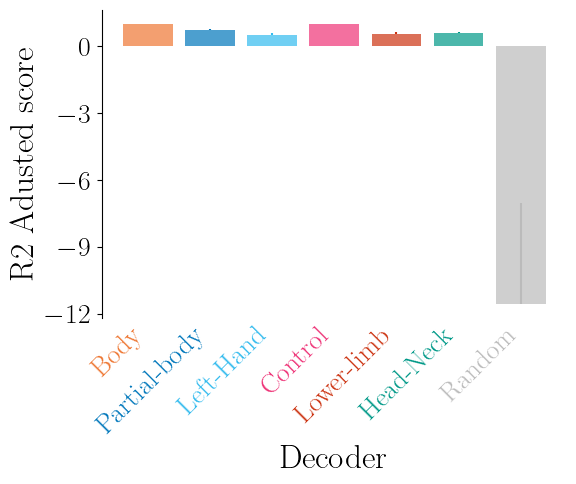

In [39]:
# Now show this on an error plot


r2AdjValsLinearAvged = np.average(r2AdjValsLinear,axis = 2).reshape(7,-1)
r2AdjValsRidgeAvged = np.average(r2AdjValsRidge,axis = 2).reshape(7,-1)

# Now plot bar plot with errors bars need to check the code below

# Define necessary variables
x =  range(0, 7)


cmap = tol_cset('vibrant')
colors = cmap[0:7]

fig = plt.figure(figsize = (8,4))
ax = plt.gca()

pf.createErrorBarPlot(r2AdjValsLinearAvged[:,:].T,xLabel = "Decoder", yLabel = "R2 Adjusted Score",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors,rot = 45,width = 0.7)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5,removeXTick=True)

for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)


# plt.yscale('log')
plt.ylim(-0.1,1.1)

plt.show()
# Define necessary variables
x =  range(0, 7)


cmap = tol_cset('vibrant')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(r2AdjValsRidgeAvged[:7,:].T,xLabel = "Decoder", yLabel = "R2 Adusted score",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5,removeXTick=True)
# plt.yscale('log')
# plt.ylim(-2,2)

Next investigate a metric for calculating the output space that a decoder can access

We first try it for a specific decoder

[[  -3.29861111  582.52720677]
 [  -5.49768519  567.6541717 ]
 [  -8.7962963   536.66868198]
 ...
 [1613.02083333  914.69165659]
 [1607.52314815  915.93107618]
 [1602.02546296  915.93107618]]


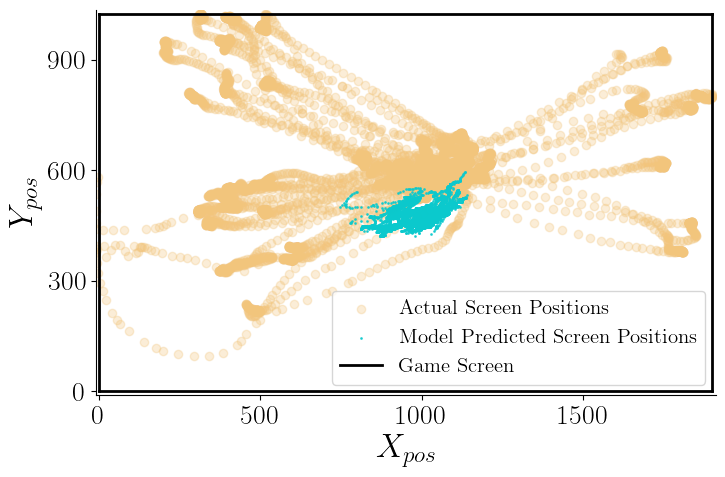

In [40]:

i = 140
predPositions =  listOfDecoderDictsLinear[i]['PredCursorPos'].copy()
truePositions =  listOfDecoderDictsLinear[i]['TestCursorPos'].copy()

predPositions[:,0] = predPositions[:,0] * 1900
predPositions[:,1] = predPositions[:,1] * 1025

truePositions[:,0] = truePositions[:,0] * 1900
truePositions[:,1] = truePositions[:,1] * 1025
print(truePositions)
# Step 4: Visualization
plt.figure(figsize=(8, 5))

ax = plt.gca()
ax.scatter(truePositions[:,0],truePositions[:,1], label = "Actual Screen Positions", color = (242/255, 197/255, 124/255), alpha = 0.3)
ax.scatter(predPositions[:,0],predPositions[:,1], color=(11/255, 201/255, 205/255), s=1,label = "Model Predicted Screen Positions", alpha = 0.8)  # Scatter plot of 2D points

blueColor = (11/255, 201/255, 205/255)
redCOlor = (214/255, 50/255, 48/255)
orangeColor = (242/255, 197/255, 124/255)

ax.plot([0,1900],[0,0],color = 'k',linewidth = 2, label = "Game Screen")
ax.plot([0,1900],[1025,1025], color = 'k',linewidth = 2)
ax.plot([0,0],[0,1025],color = 'k',linewidth = 2)
ax.plot([1900,1900],[0,1025],color = 'k',linewidth = 2)
ax.set_ylabel("", fontsize = 20)
ax.set_xlabel("$", fontsize = 20)
widthExcess = 10
ax.set_xlim(-widthExcess+0,1900+ widthExcess)
ax.set_ylim(-widthExcess+0,1025 + widthExcess)
ax.legend()
pf.defaultPlottingConfiguration(ax =ax, maxXTicks = 4, maxYTicks = 4,xlabel = r"$X_{pos}$", ylabel = r"$Y_{pos}$" )
ax.legend(loc = 'lower right',fontsize = 15)
ax.grid(False)

plt.show()
# plt.xlim(-widthExcess+0,1900+ widthExcess)
# plt.ylim(-widthExcess+0,1025 + widthExcess)

Come up with a way to plot space that a decoder has accessed

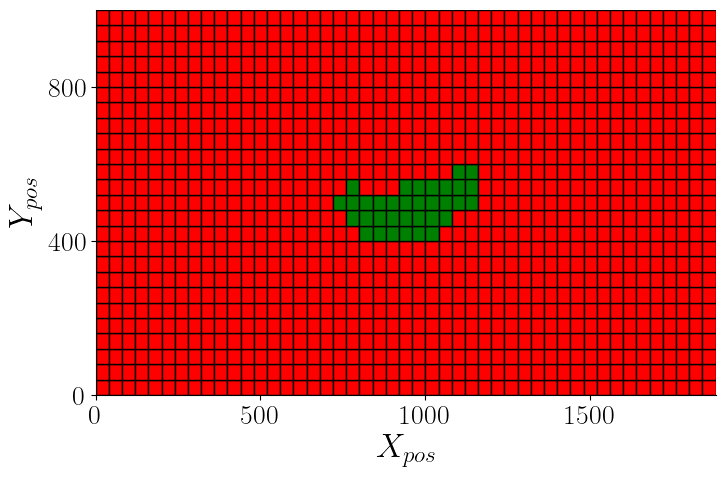

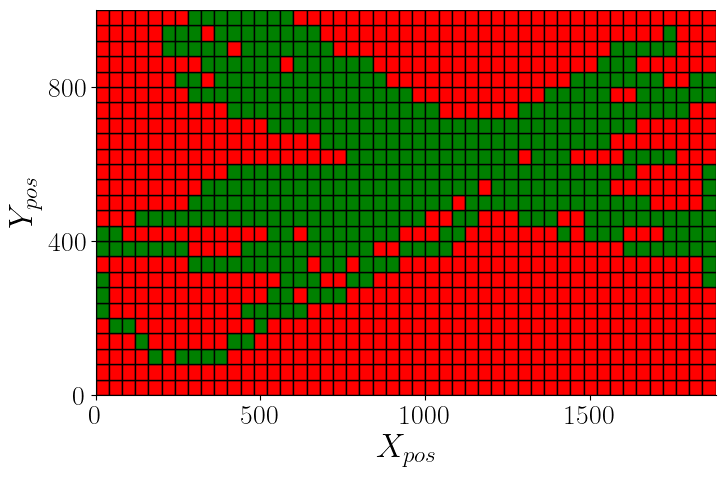

34 432
ScreenRatio: 0.0787037037037037


In [41]:
import matplotlib.pyplot as plt

def discretize_points(points, screen_width, screen_height, cell_size):
    # Determine the number of cells along each dimension
    num_cells_x = screen_width // cell_size
    num_cells_y = screen_height // cell_size

    # Initialize the grid
    grid = [[False for _ in range(num_cells_y)] for _ in range(num_cells_x)]

    for x, y in points:
        # Determine the cell coordinates for each point
        cell_x = int(x // cell_size)
        cell_y = int(y // cell_size)

        # Mark the cell as containing a point
        try:
            grid[cell_x][cell_y] = True
        except IndexError:
            pass
    return grid, num_cells_x, num_cells_y

def plot_grid(ax,grid, cell_size, num_cells_x, num_cells_y):
    
    
    # Create a patch for each cell
    for i in range(num_cells_x):
        for j in range(num_cells_y):
            # Choose color based on whether the cell contains a point
            color = 'green' if grid[i][j] else 'red'
            rect = plt.Rectangle((i * cell_size, j * cell_size), cell_size, cell_size, facecolor=color, edgecolor='black')
            ax.add_patch(rect)
    
    # Set limits and aspect ratio
    ax.set_xlim(0, num_cells_x * cell_size)
    ax.set_ylim(0, num_cells_y * cell_size)
    # ax.set_aspect('equal')
    
    # Display the plot
    #plt.gca().invert_yaxis()  # Invert y-axis to match typical screen coordinates
    


cellSize = 40
# Predicted position Grid plot
predGrid, num_cells_x, num_cells_y = discretize_points(predPositions, 1900, 1025, cellSize)
fig= plt.figure(figsize = (8,5))
ax = plt.gca()
plot_grid(ax,predGrid, cellSize, num_cells_x, num_cells_y)
pf.defaultPlottingConfiguration(ax =ax, maxXTicks = 3, maxYTicks = 3,xlabel = r"$X_{pos}$", ylabel = r"$Y_{pos}$" )
plt.show()

# True position Grid plot
fig= plt.figure(figsize = (8,5))
ax = plt.gca()
trueGrid, num_cells_x, num_cells_y = discretize_points(truePositions, 1900, 1025, cellSize)
plot_grid(ax,trueGrid, cellSize, num_cells_x, num_cells_y)
pf.defaultPlottingConfiguration(ax =ax, maxXTicks = 3, maxYTicks = 3,xlabel = r"$X_{pos}$", ylabel = r"$Y_{pos}$" )
plt.show()

print(np.count_nonzero(predGrid),np.count_nonzero(trueGrid))
print("ScreenRatio:", np.count_nonzero(predGrid)/np.count_nonzero(trueGrid))

Now we calcualte the screen ratios for all decoders (both linear and ridge in the same way)

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/3125604981.py:52: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/3125604981.py:52: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/3125604981.py:52: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/3125604981.py:52: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become

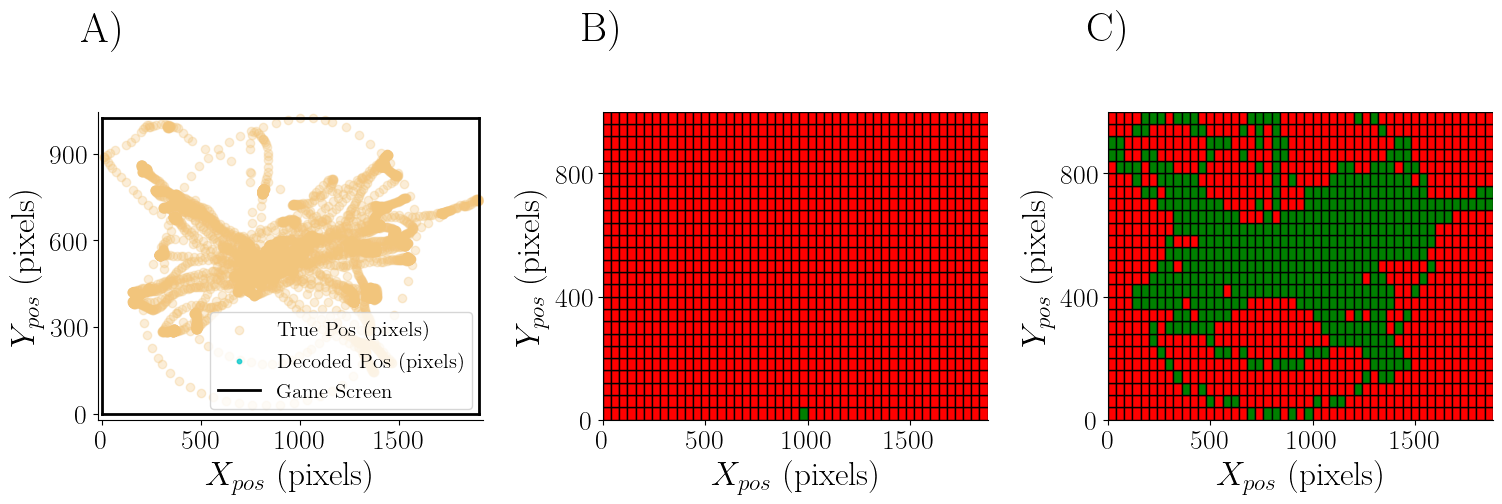

In [97]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize = (18,4))
gs = GridSpec(1,5,figure=fig,width_ratios=[0.32,0.02,0.32,0.02,0.32])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[0, 4])

ax = ax0
ax.scatter(truePositions[:,0],truePositions[:,1], label = "True Pos (pixels) ", color = (242/255, 197/255, 124/255), alpha = 0.3)
ax.scatter(predPositions[:,0],predPositions[:,1], color=(11/255, 201/255, 205/255), s=1, alpha = 0.8)  # Scatter plot of 2D points
ax.scatter([],[], color=(11/255, 201/255, 205/255), s=10,label = "Decoded Pos (pixels)", alpha = 0.8)  # Scatter plot of 2D points
blueColor = (11/255, 201/255, 205/255)
redCOlor = (214/255, 50/255, 48/255)
orangeColor = (242/255, 197/255, 124/255)

ax.plot([0,1900],[0,0],color = 'k',linewidth = 2, label = "Game Screen")
ax.plot([0,1900],[1025,1025], color = 'k',linewidth = 2)
ax.plot([0,0],[0,1025],color = 'k',linewidth = 2)
ax.plot([1900,1900],[0,1025],color = 'k',linewidth = 2)
ax.set_ylabel("", fontsize = 20)
ax.set_xlabel("$", fontsize = 20)
widthExcess = 20
ax.set_xlim(-widthExcess+0,1900+ widthExcess)
ax.set_ylim(-widthExcess+0,1025 + widthExcess)
ax.legend()
pf.defaultPlottingConfiguration(ax =ax, maxXTicks = 4, maxYTicks = 4,xlabel = r"$X_{pos}$ (pixels)", ylabel = r"$Y_{pos}$ (pixels)" )
ax.legend(loc = 'lower right',fontsize = 15)
ax.grid(False)
# ax.set_aspect('equal')
ax0.text(-1.0, 1076 * 1.3, 'A)', ha='center', va='top', fontsize=30, fontweight = "bold")
#plotPredActualPos(ax1)
ax1.text(-0.95, 1025 * 1.3, 'B)', ha='center', va='top', fontsize=30, fontweight = "bold")

#plotPredActualPos(ax2)
ax2.text(-0.95, 1025 * 1.3, 'C)', ha='center', va='top', fontsize=30, fontweight = "bold")
#plt.savefig("2.1b-screen ratio.pdf",bbox_inches = "tight")

cellSize = 40
# Predicted position Grid plot
predGrid, num_cells_x, num_cells_y = discretize_points(predPositions, 1900, 1025, cellSize)

plot_grid(ax1,predGrid, cellSize, num_cells_x, num_cells_y)
pf.defaultPlottingConfiguration(ax =ax1, maxXTicks = 3, maxYTicks = 3,xlabel = r"$X_{pos}$ (pixels)", ylabel = r"$Y_{pos}$ (pixels)" )


# True position Grid plot

trueGrid, num_cells_x, num_cells_y = discretize_points(truePositions, 1900, 1025, cellSize)
plot_grid(ax2,trueGrid, cellSize, num_cells_x, num_cells_y)
pf.defaultPlottingConfiguration(ax =ax2, maxXTicks = 3, maxYTicks = 3,xlabel = r"$X_{pos}$ (pixels)", ylabel = r"$Y_{pos}$ (pixels)" )
plt.savefig("2.1b-DecoderScreenRatio.pdf",bbox_inches = "tight")


In [43]:
# Strategy

# 1. Plot all training data decoded points
# dict
# dict['predCursorPos]

i,j,k = 0,0,0
cellSize = 50
screenRatiosLinearDecoders = np.zeros((noDecoders,noParticipants,K))
screenRatiosRidgeDecoders = np.zeros((noDecoders,noParticipants,K))

for linearDict in listOfDecoderDictsLinear:
    # Calculate pred and true test decoder positions
    predPositions =  linearDict['PredCursorPos'].copy()
    truePositions =  linearDict['TestCursorPos'].copy()

    predPositions[:,0] = predPositions[:,0] * 1900
    predPositions[:,1] = predPositions[:,1] * 1025

    truePositions[:,0] = truePositions[:,0] * 1900
    truePositions[:,1] = truePositions[:,1] * 1025

    # True position Grid plot
    trueGrid, num_cells_x, num_cells_y = discretize_points(truePositions, 1900, 1025, cellSize)

    # True position Grid plot
    predGrid, num_cells_x, num_cells_y = discretize_points(predPositions, 1900, 1025, cellSize)

    # Calc screen ratio
    #print("ScreenRatio:", np.count_nonzero(predGrid)/np.count_nonzero(trueGrid))
    screenRatiosLinearDecoders[i,j,k] = np.count_nonzero(predGrid)/np.count_nonzero(trueGrid)
    k += 1
    if k // 5 == 1:
        k = 0
        j += 1
    
    if j // 11 == 1:
        j = 0
        i += 1

i,j,k = 0,0,0
for ridgeDict in listOfDecoderDictsRidge:

    # Calculate pred and true test decoder positions
    predPositions =  ridgeDict['PredCursorPos'].copy()
    truePositions =  ridgeDict['TestCursorPos'].copy()

    predPositions[:,0] = predPositions[:,0] * 1900
    predPositions[:,1] = predPositions[:,1] * 1025

    truePositions[:,0] = truePositions[:,0] * 1900
    truePositions[:,1] = truePositions[:,1] * 1025

    # True position Grid plot
    trueGrid, num_cells_x, num_cells_y = discretize_points(truePositions, 1900, 1025, cellSize)

    # True position Grid plot
    predGrid, num_cells_x, num_cells_y = discretize_points(predPositions, 1900, 1025, cellSize)

    # Calc screen ratio
    #print("ScreenRatio:", np.count_nonzero(predGrid)/np.count_nonzero(trueGrid))
    screenRatiosRidgeDecoders[i,j,k] = np.count_nonzero(predGrid)/np.count_nonzero(trueGrid)
    k += 1
    if k // 5 == 1:
        k = 0
        j += 1
    
    if j // 11 == 1:
        j = 0
        i += 1

['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']


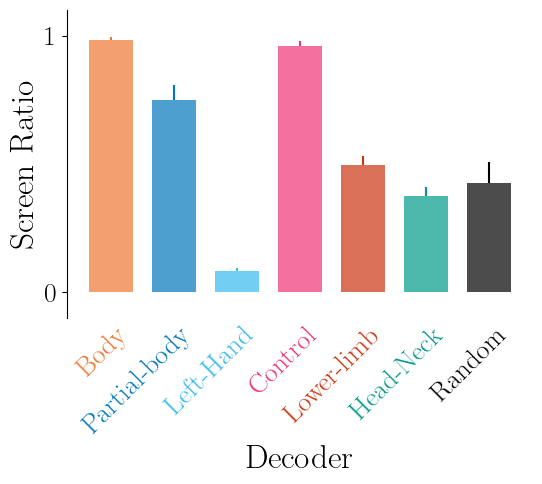

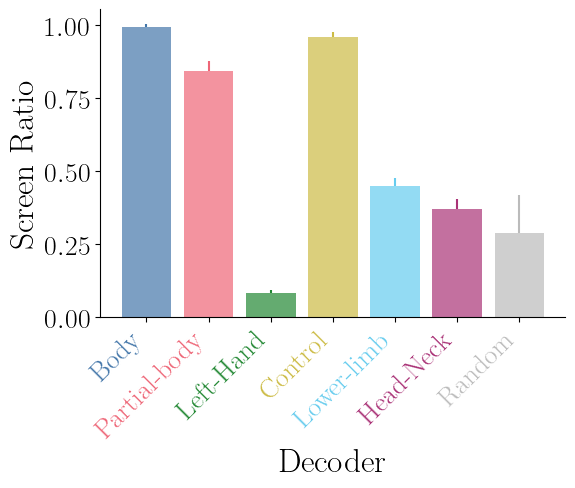

In [44]:
# Now plot bar plot with errors bars need to check the code below

# Define necessary variables


screenRatiosLinearDecodersAvged = np.average(screenRatiosLinearDecoders,axis = 2).reshape(7,-1)
screenRatiosRidgeDecodersAvged = np.average(screenRatiosRidgeDecoders,axis = 2).reshape(7,-1)
cmap = tol_cset('bright')


fig = plt.figure(figsize = (6,4))
ax = plt.gca()
def plotScreenRatios(ax0):
    x =  range(0, 7)

    cmap = tol_cset('vibrant')
    colors = list(cmap[0:7])
    print(colors)
    colors[6] = '#000000'

    pf.createErrorBarPlot(screenRatiosLinearDecodersAvged[:,:].T,xLabel = "Decoder", yLabel = "Screen Ratio",
    xTicks = x, xTickLabels = decoderLabels, ax = ax0, barColor = colors,rot = 45,width = -0.7,align='edge',colorTicks = True)
    pf.defaultPlottingConfiguration(ax0,maxYTicks = 2,removeXTick=True)
    # plt.yscale('log')
    ax.set_xticklabels(ax0.get_xticklabels(), fontweight='heavy')
    ax.set_yticks([0,1],labels = [0,1]) 
    plt.ylim(-0.1,1.1)




plotScreenRatios(ax)
plt.show()
# Define necessary variables
x =  range(0, 7)


cmap = tol_cset('bright')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(screenRatiosRidgeDecodersAvged[:7,:].T,xLabel = "Decoder", yLabel = "Screen Ratio",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5)
# plt.yscale('log')
# plt.ylim(-2,2)

Now let's assess sparsity of each decoder , here we define as the number of parameters above 1/tolerance of the maximum value

In [45]:
tolerance = 10


# binaryCodingCoefficients = coefficients.copy()
# maxCoefficient = np.max(binaryCodingCoefficients) 
# threshold = maxCoefficient / tolerance
# for i in range(binaryCodingCoefficients.shape[0]):
#     for j in range(binaryCodingCoefficients.shape[1]):
#         if abs(binaryCodingCoefficients[i,j]) >= threshold:
#             binaryCodingCoefficients[i,j] = 1
#         else:
#             binaryCodingCoefficients[i,j] = 0
# print(np.count_nonzero(binaryCodingCoefficients))
# plt.imshow(binaryCodingCoefficients)
# plt.colorbar()

i,j,k = 0,0,0
sparsitiesXLinear = np.zeros((noDecoders,noParticipants,K))
sparsitiesYLinear = np.zeros((noDecoders,noParticipants,K))

for linearDict in listOfDecoderDictsLinear:
    # Calculate pred and true test decoder positions
    coefficients =  linearDict['Coeff'].reshape(2,-1,3).copy()
    binaryCodingCoefficients = coefficients[0,:,:].copy()

    maxCoefficient = np.max(binaryCodingCoefficients) 
    threshold = maxCoefficient / tolerance

    for a in range(binaryCodingCoefficients.shape[0]):
        for b in range(binaryCodingCoefficients.shape[1]):
            if abs(binaryCodingCoefficients[a,b]) >= threshold:
                binaryCodingCoefficients[a,b] = 1
            else:
                binaryCodingCoefficients[a,b] = 0
    
    sparsitiesXLinear[i,j,k] = np.count_nonzero(binaryCodingCoefficients)

    coefficients =  linearDict['Coeff'].reshape(2,-1,3).copy()
    binaryCodingCoefficients = coefficients[1,:,:].copy()

    maxCoefficient = np.max(binaryCodingCoefficients) 
    threshold = maxCoefficient / tolerance

    for a in range(binaryCodingCoefficients.shape[0]):
        for b in range(binaryCodingCoefficients.shape[1]):
            if abs(binaryCodingCoefficients[a,b]) >= threshold:
                binaryCodingCoefficients[a,b] = 1
            else:
                binaryCodingCoefficients[a,b] = 0
    
    sparsitiesYLinear[i,j,k] = np.count_nonzero(binaryCodingCoefficients)


    k += 1
    if k // 5 == 1:
        k = 0
        j += 1
    
    if j // 11 == 1:
        j = 0
        i += 1


i,j,k = 0,0,0
sparsitiesXRidge = np.zeros((noDecoders,noParticipants,K))
sparsitiesYRidge = np.zeros((noDecoders,noParticipants,K))

for ridgeDict in listOfDecoderDictsRidge:
    # Calculate pred and true test decoder positions
    coefficients =  ridgeDict['Coeff'].reshape(2,-1,3).copy()
    binaryCodingCoefficients = coefficients[0,:,:].copy()

    maxCoefficient = np.max(binaryCodingCoefficients) 
    threshold = maxCoefficient / tolerance

    for a in range(binaryCodingCoefficients.shape[0]):
        for b in range(binaryCodingCoefficients.shape[1]):
            if abs(binaryCodingCoefficients[a,b]) >= threshold:
                binaryCodingCoefficients[a,b] = 1
            else:
                binaryCodingCoefficients[a,b] = 0
    
    sparsitiesXRidge[i,j,k] = np.count_nonzero(binaryCodingCoefficients)

    coefficients =  ridgeDict['Coeff'].reshape(2,-1,3).copy()
    binaryCodingCoefficients = coefficients[1,:,:].copy()

    maxCoefficient = np.max(binaryCodingCoefficients) 
    threshold = maxCoefficient / tolerance

    for a in range(binaryCodingCoefficients.shape[0]):
        for b in range(binaryCodingCoefficients.shape[1]):
            if abs(binaryCodingCoefficients[a,b]) >= threshold:
                binaryCodingCoefficients[a,b] = 1
            else:
                binaryCodingCoefficients[a,b] = 0
    
    sparsitiesYRidge[i,j,k] = np.count_nonzero(binaryCodingCoefficients)


    k += 1
    if k // 5 == 1:
        k = 0
        j += 1
    
    if j // 11 == 1:
        j = 0
        i += 1


We plot the sparsity seperately for the x component

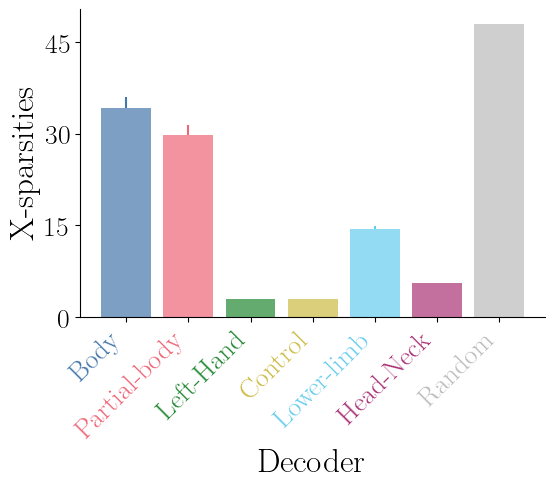

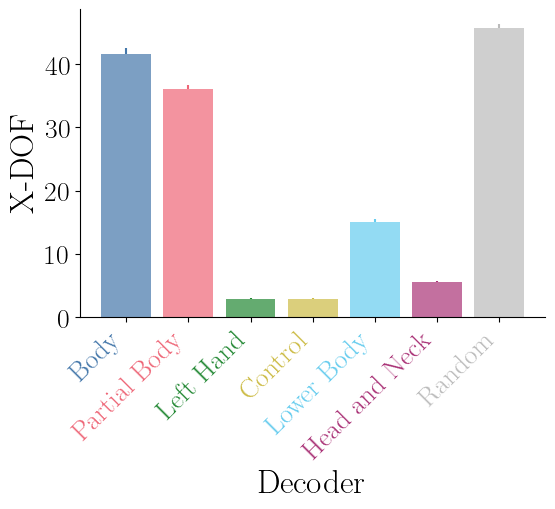

In [46]:
# Now plot bar plot with errors bars need to check the code below

# Define necessary variables
x =  range(0, 7)

sparsitiesXLinearAvged = np.average(sparsitiesXLinear,axis = 2).reshape(7,-1)
sparsitiesXRidgeAvged = np.average(sparsitiesXRidge,axis = 2).reshape(7,-1)
cmap = tol_cset('bright')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(sparsitiesXLinearAvged[:7,:].T,xLabel = "Decoder", yLabel = "X-sparsities",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5)
# plt.yscale('log')
# plt.ylim(-2,2)

plt.show()
# Define necessary variables
x =  range(0, 7)


cmap = tol_cset('bright')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(sparsitiesXRidgeAvged[:7,:].T,xLabel = "Decoder", yLabel = "X-DOF",
xTicks = x, xTickLabels = ['Body','Partial Body','Left Hand','Control','Lower Body','Head and Neck','Random'], ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5)
# plt.yscale('log')
# plt.ylim(-2,2)

and plot the sparsity for the Y component

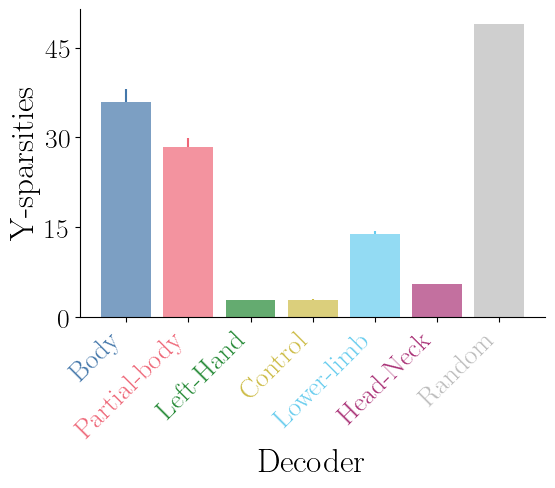

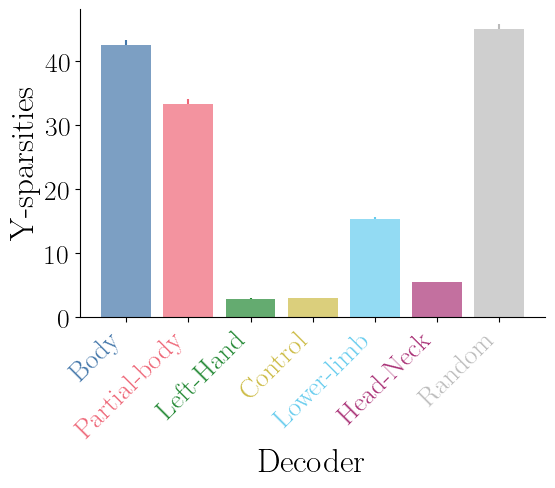

In [47]:
# Now plot bar plot with errors bars need to check the code below

# Define necessary variables
x =  range(0, 7)

sparsitiesYLinearAvged = np.average(sparsitiesYLinear,axis = 2).reshape(7,-1)
sparsitiesYRidgeAvged = np.average(sparsitiesYRidge,axis = 2).reshape(7,-1)
cmap = tol_cset('bright')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(sparsitiesYLinearAvged[:7,:].T,xLabel = "Decoder", yLabel = "Y-sparsities",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5)
# plt.yscale('log')
# plt.ylim(-2,2)

plt.show()
# Define necessary variables
x =  range(0, 7)


cmap = tol_cset('bright')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(sparsitiesYRidgeAvged[:7,:].T,xLabel = "Decoder", yLabel = "Y-sparsities",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5)
# plt.yscale('log')
# plt.ylim(-2,2)

In [48]:
dofAvged = np.concatenate([sparsitiesYLinearAvged, sparsitiesXLinearAvged]).reshape(2,7,11)
dofAvged = np.average(dofAvged,axis = 0)


Now we find the stability of the model - this is based on the coefficients

In [49]:
dofAvged

array([[38.8, 36.9, 40.2, 26.6, 33.2, 36.9, 33.2, 37.1, 21.2, 39.9, 41.5],
       [27.1, 32.8, 33. , 23.4, 27.5, 29.5, 25.8, 33.3, 24. , 34.3, 29.8],
       [ 3. ,  2.8,  2.7,  2.8,  3. ,  2.9,  2.9,  3. ,  2.7,  3. ,  2.8],
       [ 2.7,  3. ,  3. ,  2.9,  2.8,  2.9,  2.8,  3. ,  3. ,  3. ,  3. ],
       [14.1, 15.4, 15.6, 12. , 14.5, 15.5, 14. , 14. , 12.3, 13. , 15.2],
       [ 5. ,  5.7,  5.7,  5.7,  5.5,  5.4,  5.4,  5.5,  5.4,  5.5,  5.6],
       [48.5, 48.5, 48.5, 48.5, 48.5, 48.5, 48.5, 48.5, 48.5, 48.5, 48.5]])

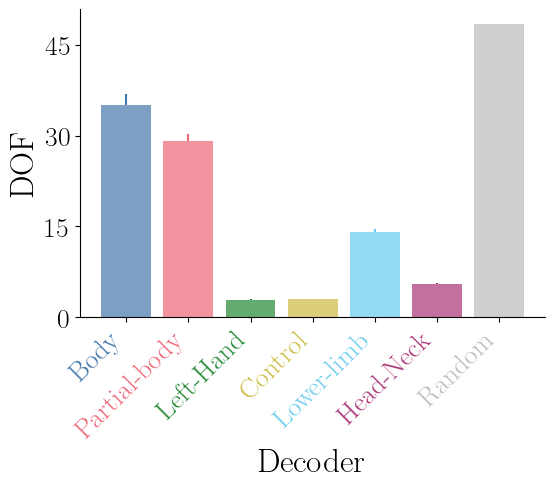

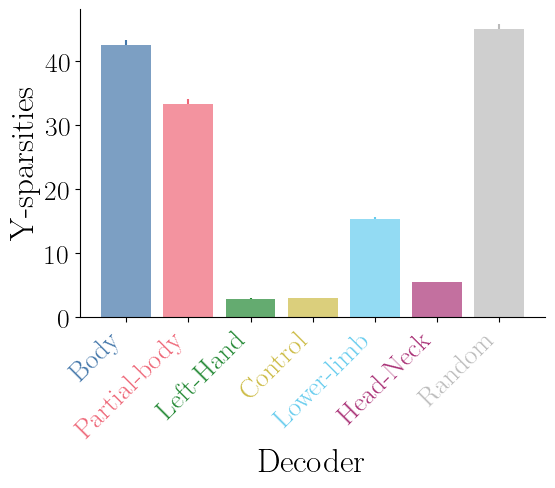

In [50]:
#AVG
# Now plot bar plot with errors bars need to check the code below

def plotDegreesOfFreedom(ax1):
    x =  range(0, 7)

    cmap = tol_cset('vibrant')
    colors = list(cmap[0:7])
    print(colors)
    colors[6] = '#000000'

    pf.createErrorBarPlot(dofAvged[:,:].T,xLabel = "Decoder", yLabel = "Degrees of control",
    xTicks = x, xTickLabels = decoderLabels, ax = ax1, barColor = colors,rot = 45,width = -0.7,align='edge',colorTicks = True)
    pf.defaultPlottingConfiguration(ax1,maxYTicks = 2,removeXTick=True)
    # plt.yscale('log')
    ax.set_xticklabels(ax1.get_xticklabels(), fontweight='heavy')
    #ax.set_yticks([0,1],labels = [0,1]) 
    #plt.ylim(0,45)


# Define necessary variables
x =  range(0, 7)


cmap = tol_cset('bright')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(dofAvged[:,:].T,xLabel = "Decoder", yLabel = "DOF",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5)
# plt.yscale('log')
# plt.ylim(-2,2)

plt.show()
# Define necessary variables
x =  range(0, 7)


cmap = tol_cset('bright')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(sparsitiesYRidgeAvged[:7,:].T,xLabel = "Decoder", yLabel = "Y-sparsities",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5)
# plt.yscale('log')
# plt.ylim(-2,2)

In [51]:

i,j,k = 0,0,0
stabilityXLinear = np.zeros((noDecoders,noParticipants,K))
stabilityYLinear = np.zeros((noDecoders,noParticipants,K))

for linearDict in listOfDecoderDictsLinear:
    # Calculate pred and true test decoder positions
    coefficients =  linearDict['Coeff'].reshape(2,-1,3).copy()
    
    stabilityXLinear[i,j,k] = np.average(np.abs(coefficients[0,:,:]))
    stabilityYLinear[i,j,k] = np.average(np.abs(coefficients[1,:,:])) 
    

    k += 1
    if k // 5 == 1:
        k = 0
        j += 1
    
    if j // 11 == 1:
        j = 0
        i += 1


i,j,k = 0,0,0
stabilityXRidge = np.zeros((noDecoders,noParticipants,K))
stabilityYRidge = np.zeros((noDecoders,noParticipants,K))

for ridgeDict in listOfDecoderDictsRidge:
    # Calculate pred and true test decoder positions
    coefficients =  ridgeDict['Coeff'].reshape(2,-1,3).copy()
    
    stabilityXRidge[i,j,k] = np.average(np.abs(coefficients[0,:,:])) 
    stabilityYRidge[i,j,k] = np.average(np.abs(coefficients[1,:,:])) 


    k += 1
    if k // 5 == 1:
        k = 0
        j += 1
    
    if j // 11 == 1:
        j = 0
        i += 1


In [52]:
rTrain, scores, noParticipants = dataExtractor.retrieveDecoderData(version = 1)


Extracting Decoder E data ...


100%|██████████| 11/11 [00:03<00:00,  3.10it/s]


Extracting Decoder F data ...


100%|██████████| 11/11 [00:03<00:00,  3.01it/s]


Extracting decoder G data ...


100%|██████████| 11/11 [00:04<00:00,  2.67it/s]


Extracting decoder H data ...


100%|██████████| 11/11 [00:06<00:00,  1.80it/s]


Extracting decoder I data ...


100%|██████████| 11/11 [00:04<00:00,  2.73it/s]


Extracting decoder J data ...


100%|██████████| 11/11 [00:04<00:00,  2.42it/s]


Extracting decoder k data ...


  9%|▉         | 1/11 [00:00<00:02,  3.80it/s]

length 1 4179
length 2 4179


100%|██████████| 11/11 [00:04<00:00,  2.74it/s]


In [53]:

# Retrieve decoder E scores
scoresE = scores[:,1]
scoresE.shape

(11,)

In [54]:
# Store all F coefficients
decoderFCoefficients = np.zeros((noParticipants,K,2,15,3)) # -x,y, 15- coeff, 3 for each limb
decoderFDicts = listOfDecoderDictsLinear[55:110]
i,j,k = 1,0,0
for linearDict in decoderFDicts:
    decoderFCoefficients[j,k,:,:,:] = linearDict['Coeff'].reshape(2,-1,3).copy()

    k += 1
    if k // 5 == 1:
        k = 0
        j += 1
    
    if j // 11 == 1:
        j = 0
        i += 1

# Average over all segments
decoderFCoefficients = np.average(decoderFCoefficients,axis = 1)


In [55]:
decoderFCoefficients.shape


decoderFSubsetXCoefficients = np.average(decoderFCoefficients[:,0,:,:],2)
decoderFSubsetXCoefficients.shape

(11, 15)

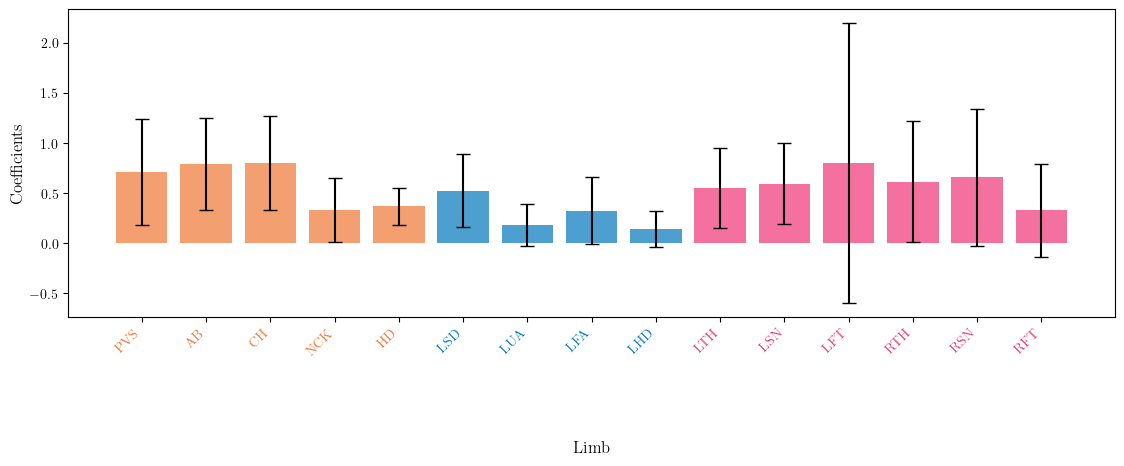

In [56]:
# Analyse coefficients

# Define necessary variables
x =  range(0, 15)

labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
    'LFA', 'LHD','LTH', 'LSN', 
    'LFT', 'RTH', 'RSN', 'RFT']

cmap = tol_cset('vibrant')
colors = [cmap[0],cmap[0],cmap[0],cmap[0],cmap[0],
          cmap[1],cmap[1],cmap[1],cmap[1],
          cmap[3],cmap[3],cmap[3],cmap[3],cmap[3],cmap[3]
]


fig = plt.figure(figsize = (13.5,4))
ax = plt.gca()
pf.createErrorBarPlot(np.abs(decoderFSubsetXCoefficients),xLabel = "Limb", yLabel = "Coefficients",
xTicks = x, xTickLabels = labels, ax = ax, barColor = colors,offsetLabel=True,plotTopErrorOnly = False,plotSEM = False)



In [57]:
def get_color_hex(value, light_color, dark_color):
    """Function returns hexadecimal color based on value between 0 and 1."""
    # Check value is bounded first
    value = max(0, min(1, value))

    # Interpolate between light and dark colors
    r = int(light_color[0] + value * (dark_color[0] - light_color[0]))
    g = int(light_color[1] + value * (dark_color[1] - light_color[1]))
    b = int(light_color[2] + value * (dark_color[2] - light_color[2]))

    # Return as hexadecimal
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

def hex_to_rgb(hex_color):
    """
    Convert a hex color string to an RGB tuple.
    
    Parameters:
    hex_color (str): Hexadecimal color string (e.g., '#6699CC')
    
    Returns:
    tuple: Corresponding (r, g, b) tuple
    """
    # Remove the hash symbol if present
    hex_color = hex_color.lstrip('#')

    # Parse the hex color string into RGB components
    r = int(hex_color[0:2], 16)
    g = int(hex_color[2:4], 16)
    b = int(hex_color[4:6], 16)

    return (r, g, b)


In [58]:
scoresE

array([ 3299., 14318.,   494.,  2456.,  3436., 15708.,  4922.,  1692.,
           0., 13516.,   618.])

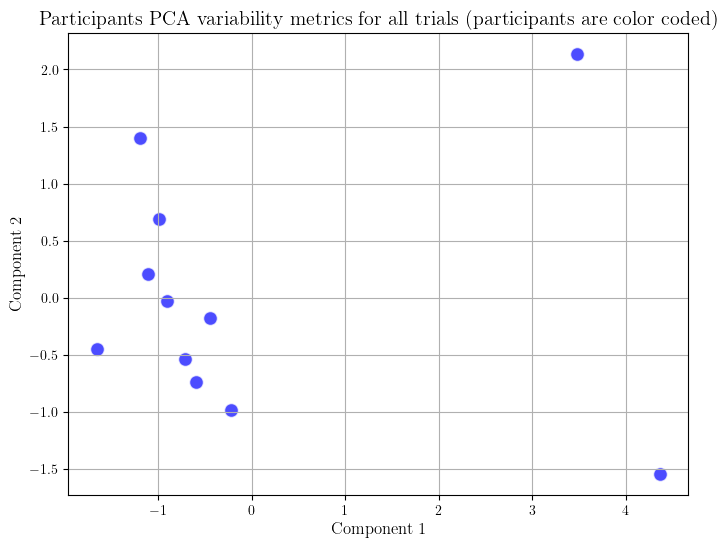

Explaine variance in PC1 and PC2: {} 0.7387546863944264


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/2009454322.py:62: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("5-PCAAnalysisDecoderF-X.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/2009454322.py:62: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("5-PCAAnalysisDecoderF-X.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/2009454322.py:62: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("5-PCAAnalysisDecoderF-X.pdf",bbox_inches='tight')


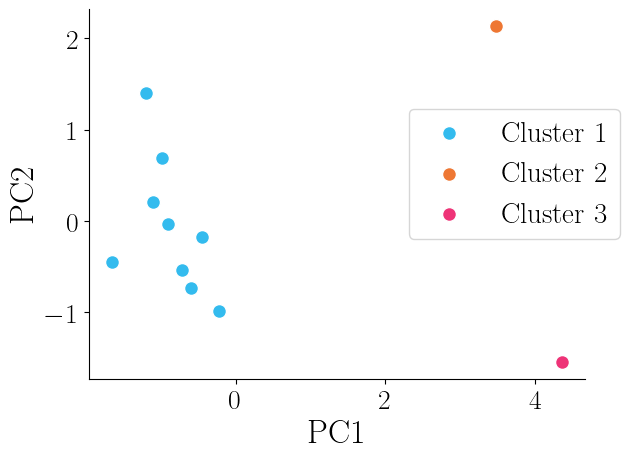

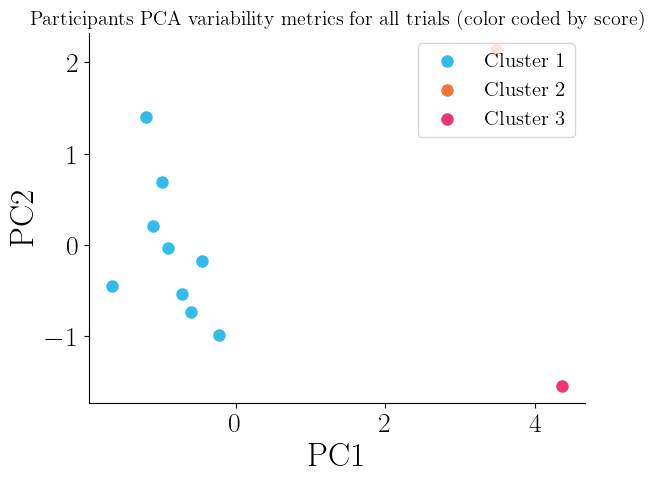

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[2 2 0 0 0 0 3 2 1 0 0] [[-0.75801063 -0.48379124]
 [ 4.36798983 -1.54064551]
 [-1.10045965  0.76836656]
 [ 3.48145291  2.13829325]]


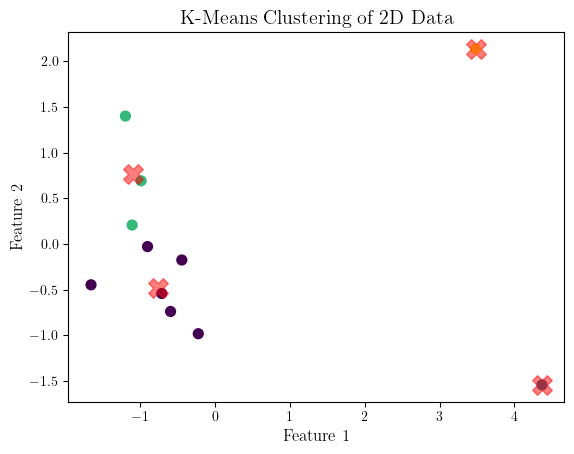

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

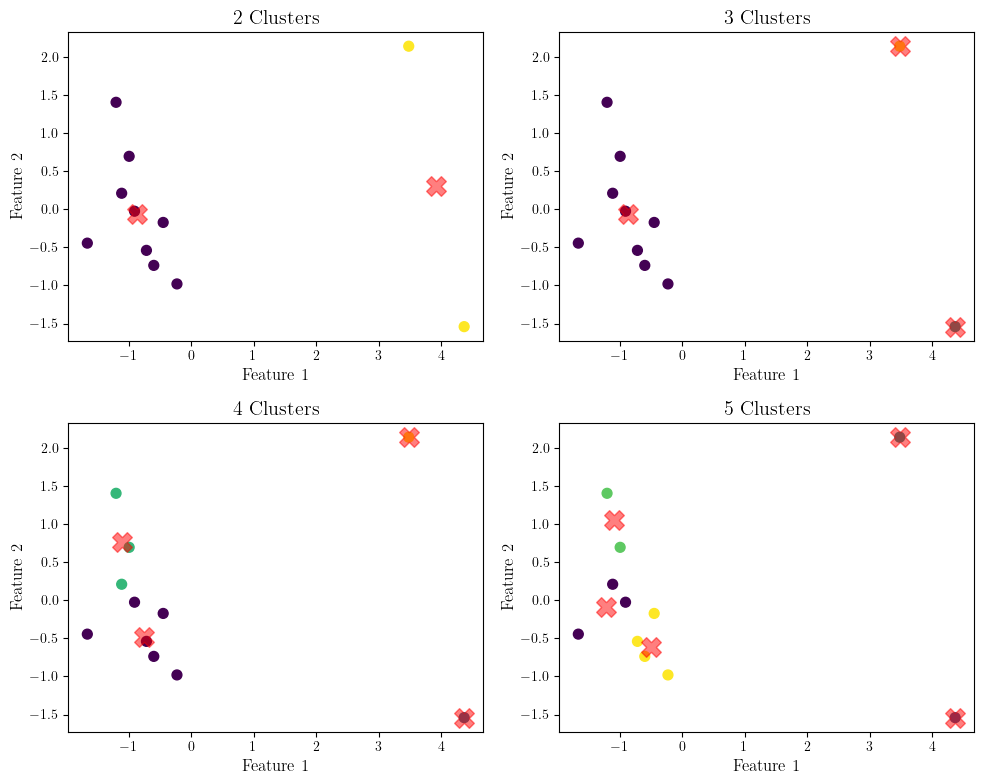

[0 0 0 0 0 0 2 0 1 0 0]


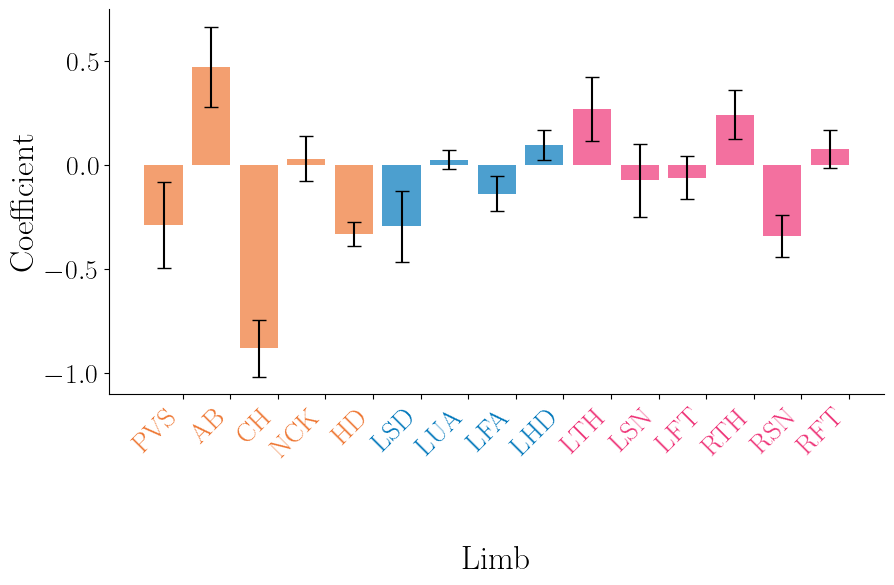

/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


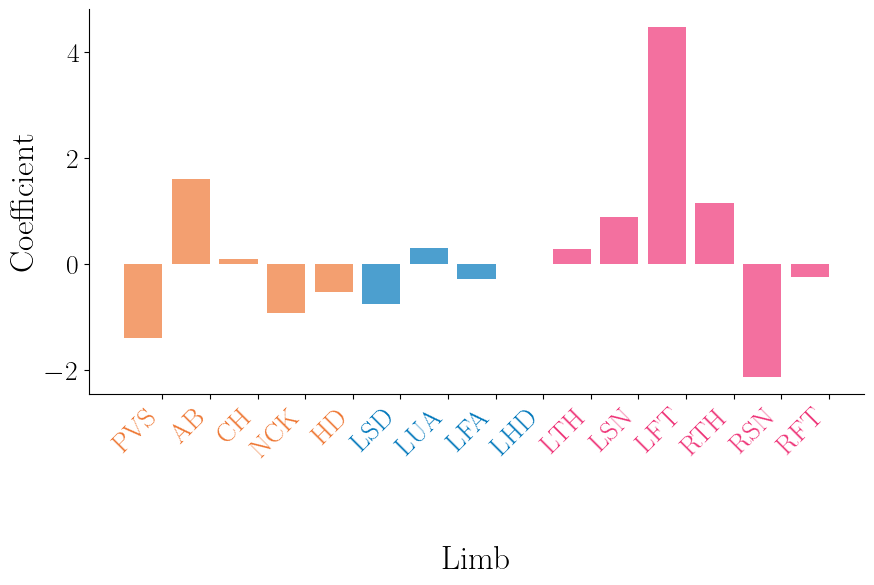

/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


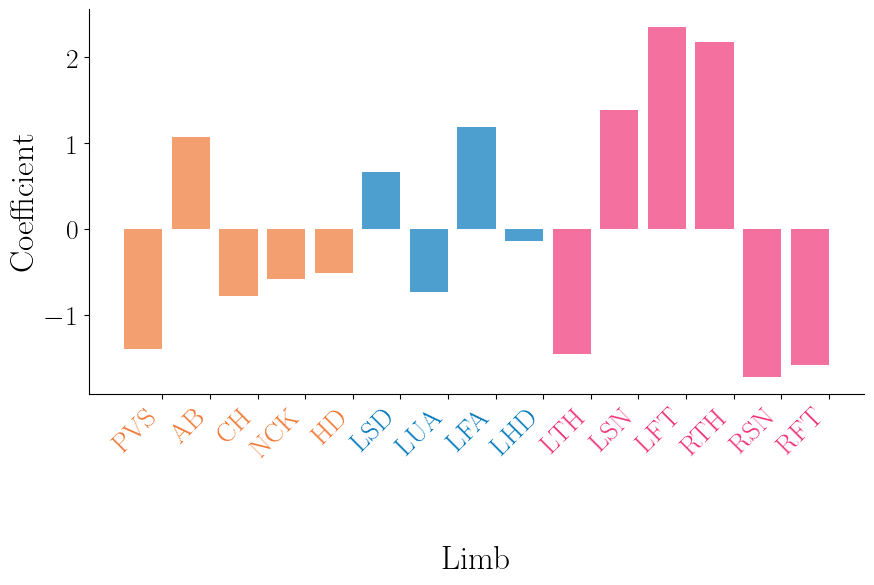

In [59]:
decoderFCoefficients.shape


decoderFSubsetXCoefficients = np.average(decoderFCoefficients[:,0,:,:],2)
decoderFSubsetXCoefficients.shape

from sklearn.decomposition import PCA
def performPCAAndPlot(data, n_components=6):
    """
    Performs PCA on the given dataset to reduce its dimensionality and plots the first two components.
    
    Parameters:
    - data: A 2D numpy array with shape (observations, features).
    - n_components: The number of principal components to keep.
    
    Returns:
    - A 2D numpy array with the transformed dataset of shape (observations, n_components).
    - The PCA model for further inspection or transformation.
    """
    # Initialize the PCA model
    pca = PCA(n_components=n_components)
    
    # Fit the PCA model to the data and transform the data onto the principal components
    transformed_data = pca.fit_transform(data)
    
    # Plot the first two components
    plt.figure(figsize=(8, 6))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.7, edgecolors='w',color='b', s=100)

    
    plt.title('Participants PCA variability metrics for all trials (participants are color coded)')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

    print("Explaine variance in PC1 and PC2: {}",sum(pca.explained_variance_ratio_[0:2]))

    # Color code according to score
    scores1D = scoresE # from 10 x 5 the F states that we traverse throigh the columns first
    maxScore = max(scoresE)



    # colour
    
    white =  (255, 255, 255) # White
    maxColor = (245,5,5) # (RGB) or F50505 (Hex)

    
    plt.scatter(transformed_data[:6, 0], transformed_data[:6, 1], alpha=1, edgecolors='w',color=cmap[2], s=100,label = "Cluster 1")
    plt.scatter(transformed_data[6, 0], transformed_data[6, 1], alpha=1, edgecolors='w',color=cmap[0], s=100, label = "Cluster 2")
    plt.scatter(transformed_data[7, 0], transformed_data[7, 1], alpha=1, edgecolors='w',color=cmap[2], s=100)
    plt.scatter(transformed_data[8, 0], transformed_data[8, 1], alpha=1, edgecolors='w',color=cmap[3], s=100, label = "Cluster 3")
    plt.scatter(transformed_data[9:, 0], transformed_data[9:, 1], alpha=1, edgecolors='w',color=cmap[2], s=100)
    ax = plt.gca()
    pf.defaultPlottingConfiguration(ax,xlabel = "PC1", ylabel = "PC2")
    ax.legend(loc = 'upper right', fontsize = 21,bbox_to_anchor=(1.1, 0.77))
    
    #plt.title('Participants PCA variability metrics for all trials (color coded by score)')
    plt.grid(False)
    plt.savefig("5-PCAAnalysisDecoderF-X.pdf",bbox_inches='tight')
    plt.show()

    return transformed_data[:,:2], pca

transformedData,pca = performPCAAndPlot(decoderFSubsetXCoefficients)
ax = plt.gca()
def pcaCoeffScatterPlot(ax):
    ax.scatter(transformedData[:6, 0], transformedData[:6, 1], alpha=1, edgecolors='w',color=cmap[2], s=100,label = "Cluster 1")
    ax.scatter(transformedData[6, 0], transformedData[6, 1], alpha=1, edgecolors='w',color=cmap[0], s=100, label = "Cluster 2")
    ax.scatter(transformedData[7, 0], transformedData[7, 1], alpha=1, edgecolors='w',color=cmap[2], s=100)
    ax.scatter(transformedData[8, 0], transformedData[8, 1], alpha=1, edgecolors='w',color=cmap[3], s=100, label = "Cluster 3")
    ax.scatter(transformedData[9:, 0], transformedData[9:, 1], alpha=1, edgecolors='w',color=cmap[2], s=100)
    ax.legend(loc = 'upper right', fontsize = 21,bbox_to_anchor=(1.15, 1.15))
    pf.defaultPlottingConfiguration(ax,xlabel = "PC1", ylabel = "PC2")
pcaCoeffScatterPlot(ax)

plt.title('Participants PCA variability metrics for all trials (color coded by score)')
plt.grid(False)
plt.show()


from sklearn.cluster import KMeans

def kMeansClustering(data, n_clusters):
    """
    Performs k-means clustering on m-dimensional data.
    
    Parameters:
    - data: A 2D numpy array of shape (num_samples, num_features) where num_samples is the number of observations
            and num_features is the dimensionality of each observation (m).
    - n_clusters: The number of clusters to form as well as the number of centroids to generate (n).
    
    Returns:
    - labels: A 1D numpy array of cluster labels for each observation.
    - centroids: A 2D numpy array representing the coordinates of each cluster center.
    """
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model to the data and predict the cluster labels
    labels = kmeans.fit_predict(data)
    
    # Extract the cluster centroids
    centroids = kmeans.cluster_centers_
    
    return labels, centroids

# Perform k-means clustering
labels, centroids = kMeansClustering(transformedData, 4)

print(labels,centroids)

plt.scatter(transformedData[:, 0], transformedData[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='X') # Centroids
plt.title('K-Means Clustering of 2D Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


def kMeansClusteringAndPlot(data, n_clusters_list):
    """
    Performs k-means clustering on the given dataset for a list of cluster numbers
    and plots each clustering result in a 2x2 subplot grid.
    
    Parameters:
    - data: A 2D numpy array of shape (num_samples, num_features).
    - n_clusters_list: A list of integers specifying the number of clusters to use in each subplot.
    """
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Setup for 2x2 subplots
    axs = axs.ravel()  # Flatten the 2x2 array of axes for easy indexing
    
    labelList = []
    for i, n_clusters in enumerate(n_clusters_list):
        # Initialize and fit KMeans model
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(data)
        labelList.append(labels)
        centroids = kmeans.cluster_centers_
        
        # Plotting the results on the ith subplot
        axs[i].scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
        axs[i].scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='X')  # Centroids
        axs[i].set_title(f'{n_clusters} Clusters')
        axs[i].set_xlabel('Feature 1')
        axs[i].set_ylabel('Feature 2')

    plt.tight_layout()
    plt.show()

    return labelList,centroids


# List of cluster counts for each subplot
n_clusters_list = [2, 3, 4, 5]

# Perform k-means clustering and plot for 2, 3, 4, and 5 clusters
kMeansLabels, centroids = kMeansClusteringAndPlot(transformedData, n_clusters_list)

# Now we want to plot average variability metrics for each category
# We try the 4 cluster one
kmeansLabel3Cluster = kMeansLabels[1] # 3rd one


# Create a dictionary to hold the indices for each number
indices_dict = {0: [], 1: [], 2: []}

# Iterate through the list and append the indices to the respective lists in the dictionary
for index, number in enumerate(kmeansLabel3Cluster):
    if number in indices_dict:
        indices_dict[number].append(index)

# Now average over each cluster
print(kmeansLabel3Cluster)
coeff = decoderFSubsetXCoefficients
zero = coeff[indices_dict[0],:]
one = coeff[indices_dict[1],:]
two = coeff[indices_dict[2],:]
#three = decoderFSubsetXCoefficients[indices_dict[3],:]

labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
                       'LFA', 'LHD', 'LTH', 'LSN', 
                       'LFT', 'RTH', 'RSN', 'RFT']

x = range(15)
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
def plotFirstComponent(ax):
    labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
    'LFA', 'LHD','LTH', 'LSN', 
    'LFT', 'RTH', 'RSN', 'RFT']

    cmap = tol_cset('vibrant')
    colors = [cmap[0],cmap[0],cmap[0],cmap[0],cmap[0],
            cmap[1],cmap[1],cmap[1],cmap[1],
            cmap[3],cmap[3],cmap[3],cmap[3],cmap[3],cmap[3]]
    pf.createErrorBarPlot(zero,xLabel = "Limb", yLabel = "Coefficient",
                        xTicks = x, xTickLabels = labels, ax = ax, barColor = colors,colorTicks = True,offsetLabel=True,plotTopErrorOnly = False,plotSEM = True,width = -0.8,align = 'edge',offsetTicks = True)
    pf.defaultPlottingConfiguration(ax)
plotFirstComponent(ax)
plt.show()

fig = plt.figure(figsize=(10,5))
ax = plt.gca()
def plotSecondComponent(ax):
    labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
        'LFA', 'LHD','LTH', 'LSN', 
        'LFT', 'RTH', 'RSN', 'RFT']

    cmap = tol_cset('vibrant')
    colors = [cmap[0],cmap[0],cmap[0],cmap[0],cmap[0],
            cmap[1],cmap[1],cmap[1],cmap[1],
            cmap[3],cmap[3],cmap[3],cmap[3],cmap[3],cmap[3]]
    pf.createErrorBarPlot(one,xLabel = "Limb", yLabel = "Coefficient",
                        xTicks = x, xTickLabels = labels, ax = ax, barColor = colors,colorTicks = True,offsetLabel=True,plotTopErrorOnly = False,plotSEM = True,width = -0.8,align = 'edge',offsetTicks = True)
    pf.defaultPlottingConfiguration(ax)
plotSecondComponent(ax)
plt.show()

fig = plt.figure(figsize=(10,5))
ax = plt.gca()
def plotThirdComponent(ax):

    labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
        'LFA', 'LHD','LTH', 'LSN', 
        'LFT', 'RTH', 'RSN', 'RFT']

    cmap = tol_cset('vibrant')
    colors = [cmap[0],cmap[0],cmap[0],cmap[0],cmap[0],
            cmap[1],cmap[1],cmap[1],cmap[1],
            cmap[3],cmap[3],cmap[3],cmap[3],cmap[3],cmap[3]]
    pf.createErrorBarPlot(two,xLabel = "Limb", yLabel = "Coefficient",
                        xTicks = x, xTickLabels = labels, ax = ax, barColor = colors,colorTicks = True,offsetLabel=True,plotTopErrorOnly = False,plotSEM = True,width = -0.8,align = 'edge',offsetTicks = True)
    pf.defaultPlottingConfiguration(ax)
    
plotThirdComponent(ax)
plt.show()

# def plotFourthComponent(ax):
#     pf.createErrorBarPlot(three,xLabel = "Limb", yLabel = "Coefficient",
#                         xTicks = x, xTickLabels = labels, ax = ax, barColor = colors,offsetLabel=True,plotTopErrorOnly = False,plotSEM = False,width = -0.8,align = 'edge')
#     pf.defaultPlottingConfiguration(ax)
    
# plotFourthComponent(ax)
# plt.show()

# fig = plt.figure(figsize=(10,5))
# plt.bar(np.linspace(0,14,15),one, label = "Cluster 2")
# plt.xticks(x, labels)
# plt.xlabel("Body Parts", fontsize = 20)
# plt.ylabel("Average variability", fontsize = 20)
# plt.title("Average variability metrics for all body parts for each trial", fontsize = 20)
# plt.legend(fontsize = 15)
# plt.tick_params(axis='y', which='major', labelsize=14)
# plt.tick_params(axis='x', which='major', labelsize=14)
# plt.show()

# fig = plt.figure(figsize=(10,5))
# plt.bar(np.linspace(0,14,15),two, label = "Cluster 3")
# plt.xticks(x, labels)
# plt.xlabel("Body Parts", fontsize = 20)
# plt.ylabel("Average variability", fontsize = 20)
# plt.title("Average variability metrics for all body parts for each trial", fontsize = 20)
# plt.legend(fontsize = 15)
# plt.tick_params(axis='y', which='major', labelsize=14)
# plt.tick_params(axis='x', which='major', labelsize=14)
# plt.show()




# Set custom x-tick labels



In [60]:
zero

array([[-1.38360928e-01,  1.86697493e-01, -6.74860085e-01,
        -1.55581183e-02, -2.75974557e-01, -1.32094811e-01,
         2.10597304e-01, -4.97877973e-01,  4.79340093e-01,
        -2.59752199e-01,  2.81503090e-01, -9.44509047e-02,
        -2.81899186e-01, -9.00644983e-02,  1.41562640e-01],
       [ 1.20180335e-01,  5.84644888e-01, -3.80596657e-01,
        -5.56511541e-01, -4.40436421e-01, -5.94760509e-02,
        -9.60084944e-02, -6.37831036e-02,  3.48879415e-02,
        -5.19616789e-01,  4.03834491e-01, -2.04422544e-01,
        -3.61534166e-01,  1.47374433e-01,  3.44181012e-02],
       [ 1.87210764e-02,  1.73186510e-01, -7.95430398e-01,
         1.43340276e-01, -1.36325109e-01, -6.47129568e-01,
        -9.32074522e-02,  2.46211667e-02, -3.67141708e-02,
         2.10711831e-01,  3.22454115e-01,  1.01460073e-01,
         1.10771166e-01, -1.76035366e-01,  1.45806468e-01],
       [-1.34808875e+00,  9.80659953e-01, -8.89492801e-01,
        -3.69851239e-02, -3.33343936e-01, -2.18861622

In [61]:
# Functions for color coding schematic

from bs4 import BeautifulSoup
import plotly.graph_objects as go
from svgpathtools import parse_path
import numpy as np

from DecoderFunctions.config_streaming import bodyParts


def extractShapesFromSVG(location,parts):
    """Extracts all shapes from an svg file

    Inputs:
        @param: location: relative location of svg file
        @param: parts: list of names of defined parts that map to shapes (should be in order of values that correspond to color strength
        of each shape) Additionally the list of names must be the same as the list of named polygons on the svg file

    Returns:
        @param: elements: list of lists, each list is the ordered vertices in each polygon, each vertex
        is supplied as an index corresponding to the location of the vertex in points
        @param: points: List of (x,y) of each point
        @param: path_elements - list of raw path data from the svg for all shapes
        @param: partMappings - mapping of each shape to its  part (value is -1 if it is just a line)
        """
    
    # Load the SVG content
    with open(location, 'r') as file:
        svg_content = file.read()

    # Create a BeautifulSoup object and specify the lxml parser
    soup = BeautifulSoup(svg_content, 'html.parser')

    # Find all the path elements
    path_elements = soup.find_all('path')








    # Initialize lists for points and elements
    points = [] # holds all points
    elements = [] # holds each polygon

    # Function to add a point if it's not already in the list and return its index
    def add_point(point):
        if point not in points:
            points.append(point)
        return points.index(point)
    #print(path_elements[0])
    partMappings = []
    # describes which polygon each rigid body is responsible, -1 indicates it is just a line

    # Iterate through each path (polygon) and update points / elements
    for pathRawData in path_elements:
        path_string = str(parse_path(pathRawData))
        truthList = [parts[i] in path_string for i in range(0,len(parts))]
        try:
            partMappings.append( truthList.index(1) )
        except:
            partMappings.append( -1 )
        
        path_data = parse_path(pathRawData.get('d'))
        # Iterate through each line in the path
        element_ =  []
        for i,line in enumerate(path_data):
            # Extract start and end points 
            start_point = (line.start.real, -line.start.imag)
            
            end_point = (line.end.real, -line.end.imag)

            # Get indices of start and end points
            start_index = add_point(start_point)
            if i == 0:
                element_.append(start_index)
            end_index = add_point(end_point)

            # Add element as indices of points
            element_.append(end_index)
        elements.append(element_)

    return elements, points, path_elements,partMappings



def drawObject(points,elements,colors,partMapping,savePath = "Composite image.svg",lineColor = '#000000',lightColor = None, darkColor = None ):
    """
    This function draws the polygons passed in elements to the screen
    requires import plotly.graph_objects as go
    and from bs4 import BeautifulSoup


    Inputs:
        @param points: list of all points (x,y) that polygon vertices form at
        @param elements: List of lists corresponding to list of vertices in each polygon, each vertex entry should be the index of the vertex from the list points 
        @param colors: List of colors for all defined shapes ( not including lines)
        @param partMapping: pointer to map each polygon to each color, if not a defined shape, the value is -1
        @param (optional) savePath: saves composite image color coded map to savePath location
        @param (optional) lineColor: color of any non defined shapes (lines) set as black
    """
    nodes=np.asarray(points).transpose()
    shapeIdx = 0
    polygons= []
    
    # Create a dummy scatter for color bar
    #print(lightColor,darkColor)
    colorbar_trace = go.Scatter(
        x=[None], 
        y=[None], 
        mode='markers',
        
        marker=dict(
            
            colorscale=[[0, lightColor], [1, darkColor]], # Adjust the colorscale based on your color range
            cmin=0,
            cmax=1,
            colorbar=dict(title="",
                        tickvals = []
                       ) # Add your color bar title here

        ),
        hoverinfo='none'
    )
    polygons.append(colorbar_trace)
    for k, element in enumerate(elements):
        if partMapping[k] != -1:
            # Fill shape
            colorIdx = partMapping[k]
            fillcolor = colors[colorIdx]
            shapeIdx += 1
        else:
            # Fill line
            fillcolor = lineColor

        polygons.append(go.Scatter(x=nodes[0][element],y=nodes[1][element],
            mode='lines',line=dict(color=lineColor, width=2), fill='toself',fillcolor=fillcolor))
        
    # Now plot data
        
    axis = dict(showline=False, zeroline=False, showgrid = False,ticks='', showticklabels=False)

    fig = go.Figure(polygons)

    fig.update_layout(width=600, height=900, showlegend=False,xaxis=axis, yaxis=axis,template="none")
    if savePath != None:    
        fig.write_image(savePath)
    fig.show()

def get_color_hex(value, light_color, dark_color):
    """Function returns hexadecimal color based on value between 0 and 1."""
    # Check value is bounded first
    value = max(0, min(1, value))

    # Interpolate between light and dark colors
    r = int(light_color[0] + value * (dark_color[0] - light_color[0]))
    g = int(light_color[1] + value * (dark_color[1] - light_color[1]))
    b = int(light_color[2] + value * (dark_color[2] - light_color[2]))

    # Return as hexadecimal
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)
    







In [62]:
# Plot the skeleton
# Color code Plot for Decoder F
print("Body Heatmap for decoder F x-axis")
# Retrieve and reshape data 
#Retrieve main cluster weights
mainClusterWeights = np.average(np.abs(zero),axis = 0)
coefficientsModel_x = mainClusterWeights


# Sum all coefficients across all rotations and positions for each rigid body and normalise
coefficientsModel_x = coefficientsModel_x / sum(coefficientsModel_x)

# Create a list with all rigid bodies in skeleton and set rigid bodies that don't have components to 0
coefficients_X = np.zeros((19))
coefficients_X[0:9] = coefficientsModel_x[0:9]
coefficients_X[13:19] = coefficientsModel_x[9:15]

# Normalise so the max value is 1
coefficients_X = coefficients_X/ max(coefficients_X)




# Set location and import body parts ( list of names of bodies that coefficients correspond to)


# Extract shape data from the svg file
elements,points,pathElements,bodyPartMapping = extractShapesFromSVG(location="BodyGraphics/body.svg",parts=bodyParts)

# Set colours for each coefficient
colours = [get_color_hex(i,(245,245,245),hex_to_rgb(cmap[1])) for i in coefficients_X]


# Draw the object 
drawObject(points,elements,colours,bodyPartMapping,"_bodySchematic_decoderF_xAxis.svg",
           lightColor='rgb(245,245,245)',darkColor= 'rgb{}'.format(hex_to_rgb(cmap[1])))
#print(coefficients_E_X)


# Plot the skeleton
# Color code Plot for Decoder F








Body Heatmap for decoder F x-axis


/usr/local/lib/python3.11/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [63]:
'rgb\'{}'.format(hex_to_rgb(cmap[0]))

"rgb'(238, 119, 51)"

/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:45: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:41: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:45: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:41: RuntimeWarning:

invalid value encountered in reduce

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/1270240569.py:56: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/1270240569.py:56: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

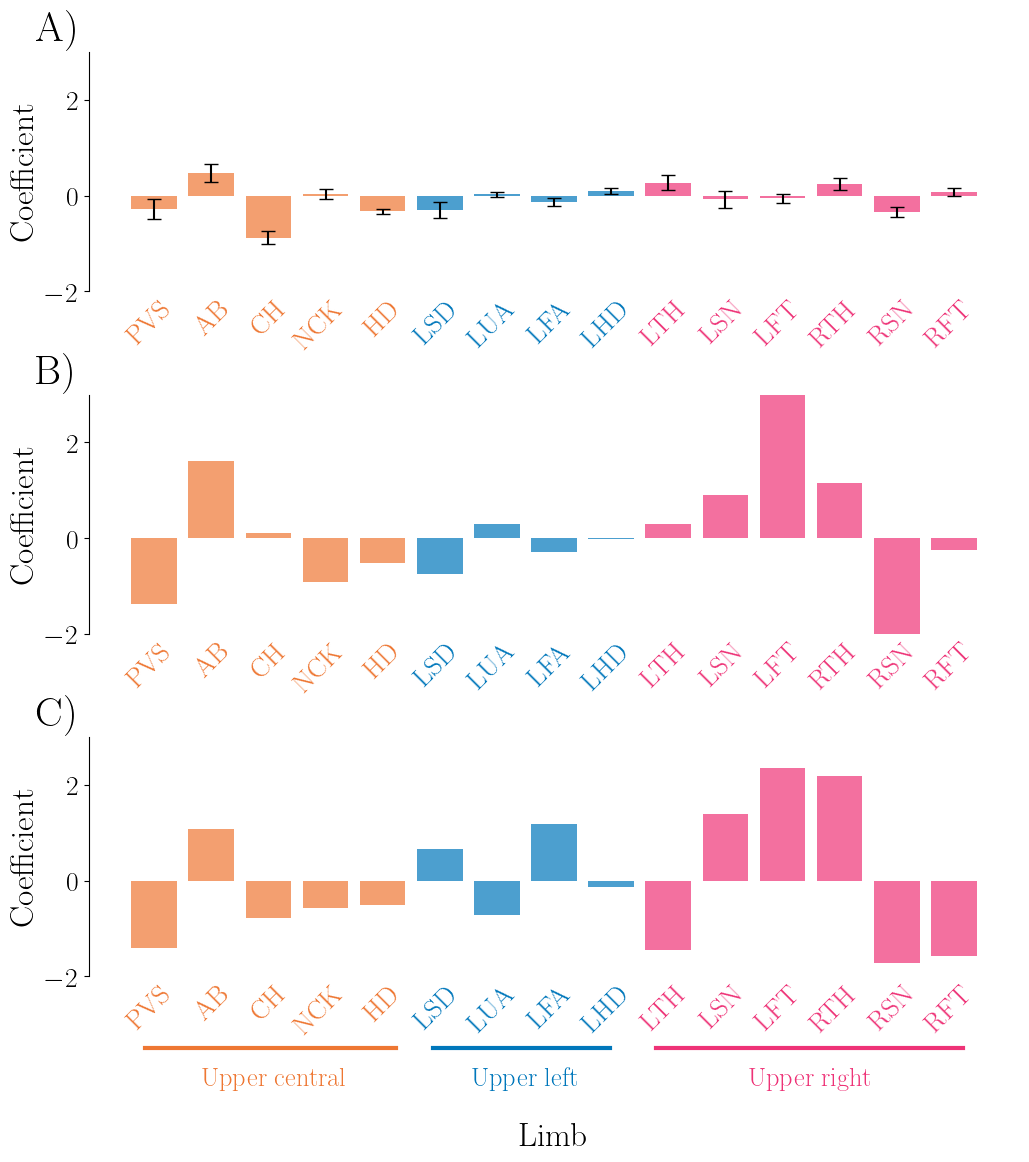

In [64]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize = (12,12))
gs = GridSpec(5,1,figure=fig,height_ratios=[0.30,0.05,0.30,0.05,0.30],width_ratios=[1])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[2, 0])
ax2 = fig.add_subplot(gs[4, 0])

cmap = tol_cset('vibrant')
plotFirstComponent(ax0)
pf.defaultPlottingConfiguration(ax0,removeXTick=True)
ax0.text(-1.7, 3*1.3, 'A)', ha='center', va='top', fontsize=30, fontweight = "bold")
ax0.set_ylim(-2,3)



plotSecondComponent(ax1)
pf.defaultPlottingConfiguration(ax1,removeXTick=True)
ax1.text(-1.7, 3 * 1.3, 'B)', ha='center', va='top', fontsize=30, fontweight = "bold")
ax1.set_ylim(-2,3)

plotThirdComponent(ax2)
pf.defaultPlottingConfiguration(ax2,removeXTick=True)
ax2.text(-1.7, 3* 1.3, 'C)', ha='center', va='top', fontsize=30, fontweight = "bold")
ax2.set_ylim(-2,3)
labelHeight = -3.5
diff = 0.4
addLines = True
if addLines:
    labelSize = 19
    ax2.axhline(y=labelHeight, xmin=0.06, xmax=0.33, color=cmap[0], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    ax2.text(2.1, labelHeight - diff, 'Upper central', ha='center', va='top', color=cmap[0], fontsize=labelSize, fontweight = "bold")

    ax2.axhline(y=labelHeight, xmin=0.37, xmax=0.56, color=cmap[1], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    ax2.text(6.5, labelHeight -diff, 'Upper left', ha='center', va='top', color=cmap[1], fontsize=labelSize, fontweight = "bold")

    ax2.axhline(y=labelHeight, xmin=0.61, xmax=0.94, color=cmap[3], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    ax2.text(11.5, labelHeight - diff, 'Upper right', ha='center', va='top', color=cmap[3], fontsize=labelSize, fontweight = "bold")


    # Set limits if necessary to make room for group labels
    #ax2.set_ylim(bottom=-0.0)  # Lower the y-limit to make space for the text
    #ax2.set_xlim(-0.6,14.5)
# plotThirdComponent(ax2)
# # ax2.legend(loc = 'upper right', fontsize = 21,bbox_to_anchor=(1.25, 1.35))
# # ax1.legend(loc = 'upper right', fontsize = 21,bbox_to_anchor=(1.05, 1.35))
# # ax0.legend(loc = 'upper right', fontsize = 21,bbox_to_anchor=(1.05, 1.35))
# ax2.set_ylim(-2,3)
#ax2.text(-1.15, 1.21, 'C)', ha='center', va='top', fontsize=30, fontweight = "bold")
plt.savefig("5-ModelFCoefficients-X.pdf",bbox_inches = "tight")



now do for Y

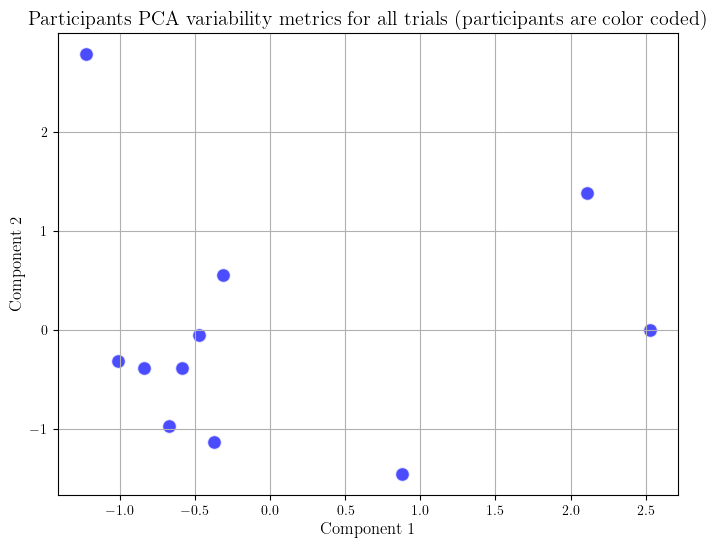

Explaine variance in PC1 and PC2: {} 0.6478002885335223


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/4218209121.py:63: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/4218209121.py:63: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/4218209121.py:63: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later



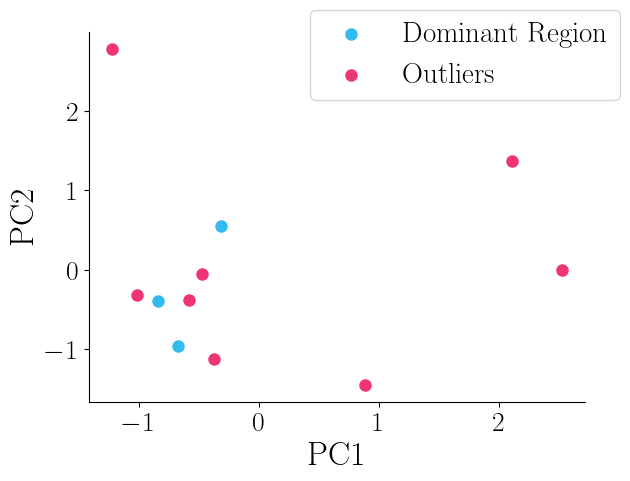

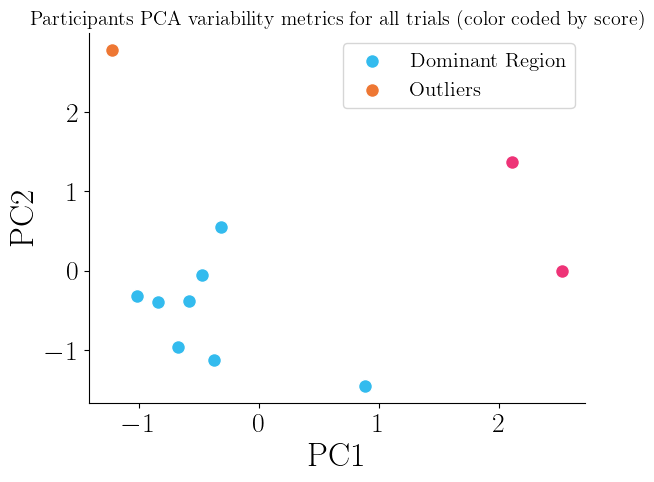

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[0 0 0 2 0 0 1 1 3 0 0] [[-0.61192399 -0.38643577]
 [ 2.31626271  0.68694032]
 [-1.22829256  2.78610672]
 [ 0.87923508 -1.454937  ]]


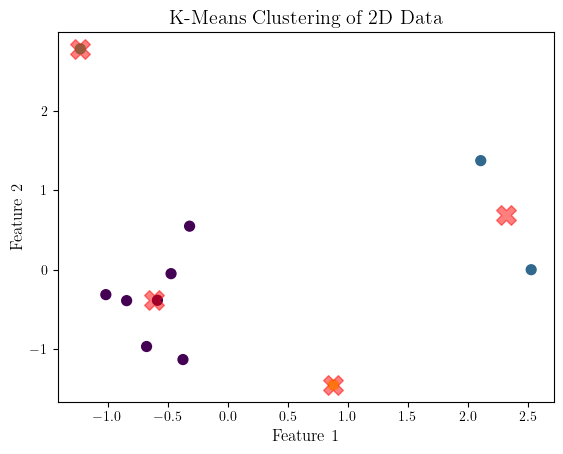

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



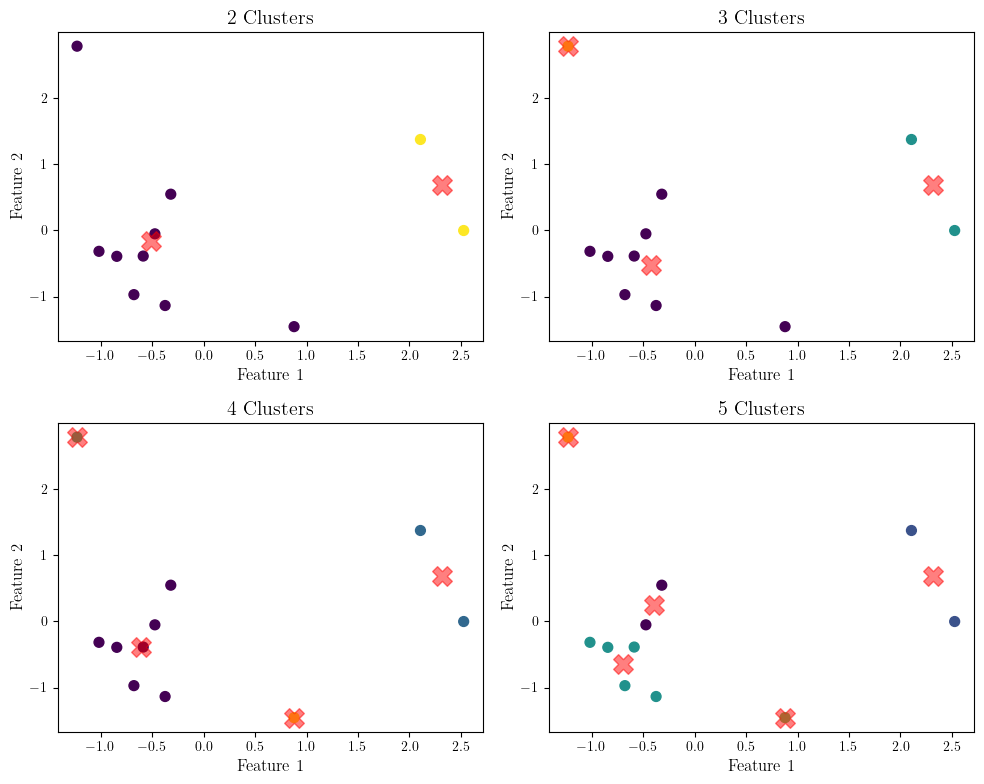

[0 0 0 2 0 0 1 1 0 0 0]


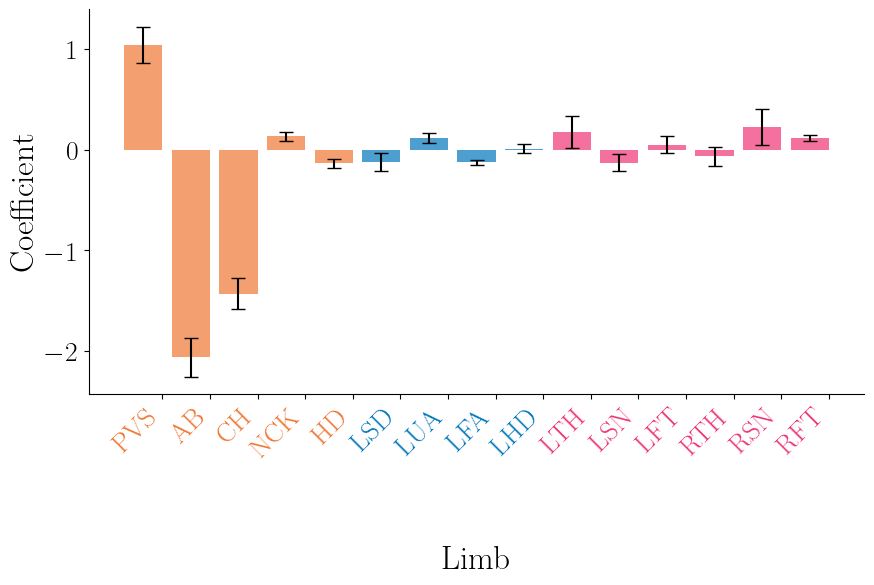

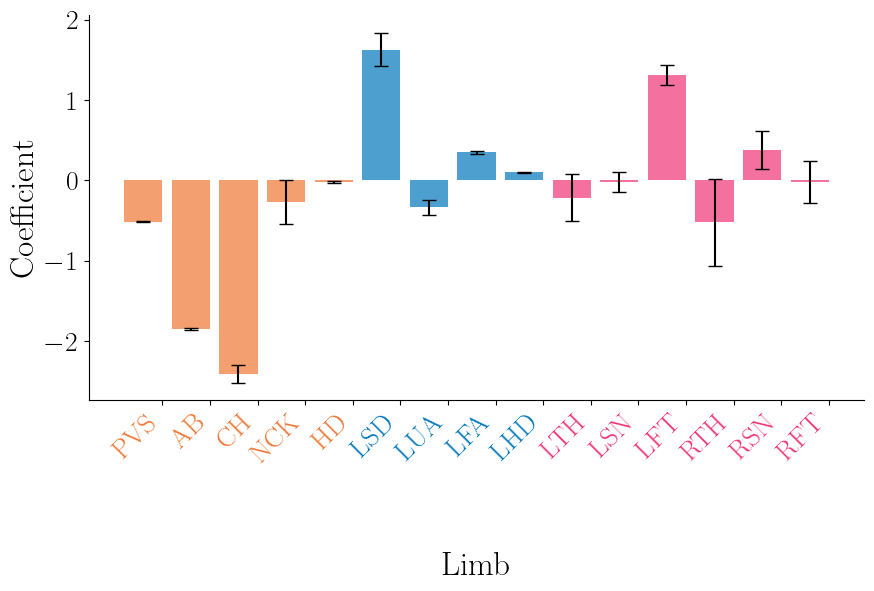

/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:45: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:41: RuntimeWarning:

invalid value encountered in reduce



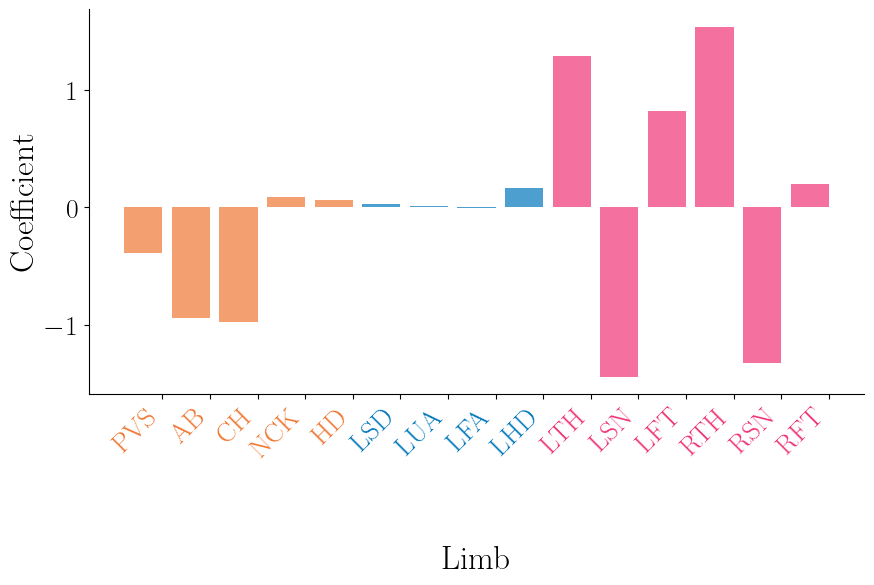

In [79]:
decoderFCoefficients.shape


decoderFSubsetYCoefficients = np.average(decoderFCoefficients[:,1,:,:],2)
decoderFSubsetYCoefficients.shape

from sklearn.decomposition import PCA
def performPCAAndPlot(data, n_components=6):
    """
    Performs PCA on the given dataset to reduce its dimensionality and plots the first two components.
    
    Parameters:
    - data: A 2D numpy array with shape (observations, features).
    - n_components: The number of principal components to keep.
    
    Returns:
    - A 2D numpy array with the transformed dataset of shape (observations, n_components).
    - The PCA model for further inspection or transformation.
    """
    # Initialize the PCA model
    pca = PCA(n_components=n_components)
    
    # Fit the PCA model to the data and transform the data onto the principal components
    transformed_data = pca.fit_transform(data)
    
    # Plot the first two components
    plt.figure(figsize=(8, 6))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.7, edgecolors='w',color='b', s=100)

    
    plt.title('Participants PCA variability metrics for all trials (participants are color coded)')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

    print("Explaine variance in PC1 and PC2: {}",sum(pca.explained_variance_ratio_[0:2]))

    # Color code according to score
    scores1D = scoresE # from 10 x 5 the F states that we traverse throigh the columns first
    maxScore = max(scoresE)



    # colour
    
    white =  (255, 255, 255) # White
    maxColor = (245,5,5) # (RGB) or F50505 (Hex)

    
    plt.scatter(transformed_data[:3, 0], transformed_data[:3, 1], alpha=1, edgecolors='w',color=cmap[2], s=100,label = "Dominant Region")
    plt.scatter(transformed_data[6:8, 0], transformed_data[6:8, 1], alpha=1, edgecolors='w',color=cmap[3], s=100, label = "Outliers")
    plt.scatter(transformed_data[3, 0], transformed_data[3, 1], alpha=1, edgecolors='w',color=cmap[3], s=100)
    plt.scatter(transformed_data[4:6, 0], transformed_data[4:6, 1], alpha=1, edgecolors='w',color=cmap[3], s=100)
    
    plt.scatter(transformed_data[8:, 0], transformed_data[8:, 1], alpha=1, edgecolors='w',color=cmap[3], s=100)
    ax = plt.gca()
    pf.defaultPlottingConfiguration(ax,xlabel = "PC1", ylabel = "PC2")
    ax.legend(loc = 'upper right', fontsize = 21,bbox_to_anchor=(1.1, 1.1))
    
    #plt.title('Participants PCA variability metrics for all trials (color coded by score)')
    plt.grid(False)
    plt.savefig("5-PCAAnalysisDecoderF-Y.pdf",bbox_inches='tight')
    plt.show()

    return transformed_data[:,:2], pca

transformedData,pca = performPCAAndPlot(decoderFSubsetYCoefficients)
ax = plt.gca()
def pcaCoeffScatterPlot(ax):
    ax.scatter(transformedData[:3, 0], transformedData[:3, 1], alpha=1, edgecolors='w',color=cmap[2], s=100,label = "Dominant Region")
    ax.scatter(transformedData[3, 0], transformedData[3, 1], alpha=1, edgecolors='w',color=cmap[0], s=100, label = "Outliers")
    ax.scatter(transformedData[4:6, 0], transformedData[4:6, 1], alpha=1, edgecolors='w',color=cmap[2], s=100)
    ax.scatter(transformedData[6:8, 0], transformedData[6:8, 1], alpha=1, edgecolors='w',color=cmap[3], s=100)
    ax.scatter(transformedData[8:, 0], transformedData[8:, 1], alpha=1, edgecolors='w',color=cmap[2], s=100)
    ax.legend(loc = 'upper right', fontsize = 21,bbox_to_anchor=(1.15, 1.15))
    pf.defaultPlottingConfiguration(ax,xlabel = "PC1", ylabel = "PC2")
pcaCoeffScatterPlot(ax)

plt.title('Participants PCA variability metrics for all trials (color coded by score)')
plt.grid(False)
plt.show()


from sklearn.cluster import KMeans

def kMeansClustering(data, n_clusters):
    """
    Performs k-means clustering on m-dimensional data.
    
    Parameters:
    - data: A 2D numpy array of shape (num_samples, num_features) where num_samples is the number of observations
            and num_features is the dimensionality of each observation (m).
    - n_clusters: The number of clusters to form as well as the number of centroids to generate (n).
    
    Returns:
    - labels: A 1D numpy array of cluster labels for each observation.
    - centroids: A 2D numpy array representing the coordinates of each cluster center.
    """
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model to the data and predict the cluster labels
    labels = kmeans.fit_predict(data)
    
    # Extract the cluster centroids
    centroids = kmeans.cluster_centers_
    
    return labels, centroids

# Perform k-means clustering
labels, centroids = kMeansClustering(transformedData, 4)

print(labels,centroids)

plt.scatter(transformedData[:, 0], transformedData[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='X') # Centroids
plt.title('K-Means Clustering of 2D Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


def kMeansClusteringAndPlot(data, n_clusters_list):
    """
    Performs k-means clustering on the given dataset for a list of cluster numbers
    and plots each clustering result in a 2x2 subplot grid.
    
    Parameters:
    - data: A 2D numpy array of shape (num_samples, num_features).
    - n_clusters_list: A list of integers specifying the number of clusters to use in each subplot.
    """
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Setup for 2x2 subplots
    axs = axs.ravel()  # Flatten the 2x2 array of axes for easy indexing
    
    labelList = []
    for i, n_clusters in enumerate(n_clusters_list):
        # Initialize and fit KMeans model
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(data)
        labelList.append(labels)
        centroids = kmeans.cluster_centers_
        
        # Plotting the results on the ith subplot
        axs[i].scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
        axs[i].scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='X')  # Centroids
        axs[i].set_title(f'{n_clusters} Clusters')
        axs[i].set_xlabel('Feature 1')
        axs[i].set_ylabel('Feature 2')

    plt.tight_layout()
    plt.show()

    return labelList,centroids


# List of cluster counts for each subplot
n_clusters_list = [2, 3, 4, 5]

# Perform k-means clustering and plot for 2, 3, 4, and 5 clusters
kMeansLabels, centroids = kMeansClusteringAndPlot(transformedData, n_clusters_list)

# Now we want to plot average variability metrics for each category
# We try the 4 cluster one
kmeansLabel3Cluster = kMeansLabels[1] # 3rd one


# Create a dictionary to hold the indices for each number
indices_dict = {0: [], 1: [], 2: []}

# Iterate through the list and append the indices to the respective lists in the dictionary
for index, number in enumerate(kmeansLabel3Cluster):
    if number in indices_dict:
        indices_dict[number].append(index)

# Now average over each cluster
print(kmeansLabel3Cluster)
coeff = decoderFSubsetYCoefficients
zero = coeff[indices_dict[0],:]
one = coeff[indices_dict[1],:]
two = coeff[indices_dict[2],:]
#three = decoderFSubsetXCoefficients[indices_dict[3],:]

labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
                       'LFA', 'LHD', 'LTH', 'LSN', 
                       'LFT', 'RTH', 'RSN', 'RFT']

x = range(15)
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
def plotFirstComponent(ax):
    labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
    'LFA', 'LHD','LTH', 'LSN', 
    'LFT', 'RTH', 'RSN', 'RFT']

    cmap = tol_cset('vibrant')
    colors = [cmap[0],cmap[0],cmap[0],cmap[0],cmap[0],
            cmap[1],cmap[1],cmap[1],cmap[1],
            cmap[3],cmap[3],cmap[3],cmap[3],cmap[3],cmap[3]]
    pf.createErrorBarPlot(zero,xLabel = "Limb", yLabel = "Coefficient",
                        xTicks = x, xTickLabels = labels, ax = ax, barColor = colors,colorTicks = True,offsetLabel=True,plotTopErrorOnly = False,plotSEM = True,width = -0.8,align = 'edge',offsetTicks = True)
    pf.defaultPlottingConfiguration(ax)
plotFirstComponent(ax)
plt.show()

fig = plt.figure(figsize=(10,5))
ax = plt.gca()
def plotSecondComponent(ax):
    labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
        'LFA', 'LHD','LTH', 'LSN', 
        'LFT', 'RTH', 'RSN', 'RFT']

    cmap = tol_cset('vibrant')
    colors = [cmap[0],cmap[0],cmap[0],cmap[0],cmap[0],
            cmap[1],cmap[1],cmap[1],cmap[1],
            cmap[3],cmap[3],cmap[3],cmap[3],cmap[3],cmap[3]]
    pf.createErrorBarPlot(one,xLabel = "Limb", yLabel = "Coefficient",
                        xTicks = x, xTickLabels = labels, ax = ax, barColor = colors,colorTicks = True,offsetLabel=True,plotTopErrorOnly = False,plotSEM = True,width = -0.8,align = 'edge',offsetTicks = True)
    pf.defaultPlottingConfiguration(ax)
plotSecondComponent(ax)
plt.show()

fig = plt.figure(figsize=(10,5))
ax = plt.gca()
def plotThirdComponent(ax):

    labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
        'LFA', 'LHD','LTH', 'LSN', 
        'LFT', 'RTH', 'RSN', 'RFT']

    cmap = tol_cset('vibrant')
    colors = [cmap[0],cmap[0],cmap[0],cmap[0],cmap[0],
            cmap[1],cmap[1],cmap[1],cmap[1],
            cmap[3],cmap[3],cmap[3],cmap[3],cmap[3],cmap[3]]
    pf.createErrorBarPlot(two,xLabel = "Limb", yLabel = "Coefficient",
                        xTicks = x, xTickLabels = labels, ax = ax, barColor = colors,colorTicks = True,offsetLabel=True,plotTopErrorOnly = False,plotSEM = True,width = -0.8,align = 'edge',offsetTicks = True)
    pf.defaultPlottingConfiguration(ax)
    
plotThirdComponent(ax)
plt.show()

# def plotFourthComponent(ax):
#     pf.createErrorBarPlot(three,xLabel = "Limb", yLabel = "Coefficient",
#                         xTicks = x, xTickLabels = labels, ax = ax, barColor = colors,offsetLabel=True,plotTopErrorOnly = False,plotSEM = False,width = -0.8,align = 'edge')
#     pf.defaultPlottingConfiguration(ax)
    
# plotFourthComponent(ax)
# plt.show()

# fig = plt.figure(figsize=(10,5))
# plt.bar(np.linspace(0,14,15),one, label = "Cluster 2")
# plt.xticks(x, labels)
# plt.xlabel("Body Parts", fontsize = 20)
# plt.ylabel("Average variability", fontsize = 20)
# plt.title("Average variability metrics for all body parts for each trial", fontsize = 20)
# plt.legend(fontsize = 15)
# plt.tick_params(axis='y', which='major', labelsize=14)
# plt.tick_params(axis='x', which='major', labelsize=14)
# plt.show()

# fig = plt.figure(figsize=(10,5))
# plt.bar(np.linspace(0,14,15),two, label = "Cluster 3")
# plt.xticks(x, labels)
# plt.xlabel("Body Parts", fontsize = 20)
# plt.ylabel("Average variability", fontsize = 20)
# plt.title("Average variability metrics for all body parts for each trial", fontsize = 20)
# plt.legend(fontsize = 15)
# plt.tick_params(axis='y', which='major', labelsize=14)
# plt.tick_params(axis='x', which='major', labelsize=14)
# plt.show()




# Set custom x-tick labels



In [80]:
zero

array([[ 1.51226836e+00, -1.97738018e+00, -9.11536713e-01,
         6.58699080e-02, -1.27315726e-01,  1.42209515e-01,
        -4.25918177e-02, -2.04681664e-01,  3.13301596e-01,
         1.29883639e-01, -4.83712991e-02, -2.37229356e-02,
         2.32606663e-01, -1.09008167e-01,  1.03985076e-01],
       [ 2.04503730e+00, -2.69860079e+00, -1.74575597e+00,
         9.66943289e-02, -2.71574062e-01,  7.73573901e-02,
         2.01008665e-01, -1.86734957e-01,  9.83751573e-02,
         4.68720684e-01, -4.44013767e-02,  3.83120395e-01,
        -9.76537143e-03, -1.14529066e-01,  2.26677368e-01],
       [ 3.07185145e-01, -8.64378415e-01, -1.03210545e+00,
        -5.89934091e-03, -1.58946881e-02, -5.57436739e-02,
         1.71900189e-02, -6.64279805e-02, -1.27026794e-01,
         1.79175881e-01, -7.18844428e-02,  1.75352425e-01,
         7.83896426e-02, -5.40755230e-02,  8.19200085e-02],
       [ 1.50584630e+00, -2.49985790e+00, -1.79948342e+00,
         3.16017565e-01, -3.07747503e-02, -2.38682749

In [81]:
print("Body Heatmap for decoder F y-axis")
# Retrieve and reshape data 
#Retrieve main cluster weights
mainClusterWeights = np.average(np.abs(zero),axis = 0)
coefficientsModel_x = mainClusterWeights


# Sum all coefficients across all rotations and positions for each rigid body and normalise
coefficientsModel_x = coefficientsModel_x / sum(coefficientsModel_x)

# Create a list with all rigid bodies in skeleton and set rigid bodies that don't have components to 0
coefficients_X = np.zeros((19))
coefficients_X[0:9] = coefficientsModel_x[0:9]
coefficients_X[13:19] = coefficientsModel_x[9:15]

# Normalise so the max value is 1
coefficients_X = coefficients_X/ max(coefficients_X)

# Set location and import body parts ( list of names of bodies that coefficients correspond to)


# Extract shape data from the svg file
elements,points,pathElements,bodyPartMapping = extractShapesFromSVG(location="BodyGraphics/body.svg",parts=bodyParts)

# Set colours for each coefficient
colours = [get_color_hex(i,(245,245,245),hex_to_rgb(cmap[1])) for i in coefficients_X]


# Draw the object 
drawObject(points,elements,colours,bodyPartMapping,"_bodySchematic_decoderF_yAxis.svg",
           lightColor='rgb(245,245,245)',darkColor= 'rgb{}'.format(hex_to_rgb(cmap[1])))
#print(coefficients_E_X)



Body Heatmap for decoder F y-axis


/usr/local/lib/python3.11/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning:

It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.



/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:45: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:41: RuntimeWarning:

invalid value encountered in reduce

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/2850635414.py:56: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/2850635414.py:56: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/2850635414.py:56: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two mino

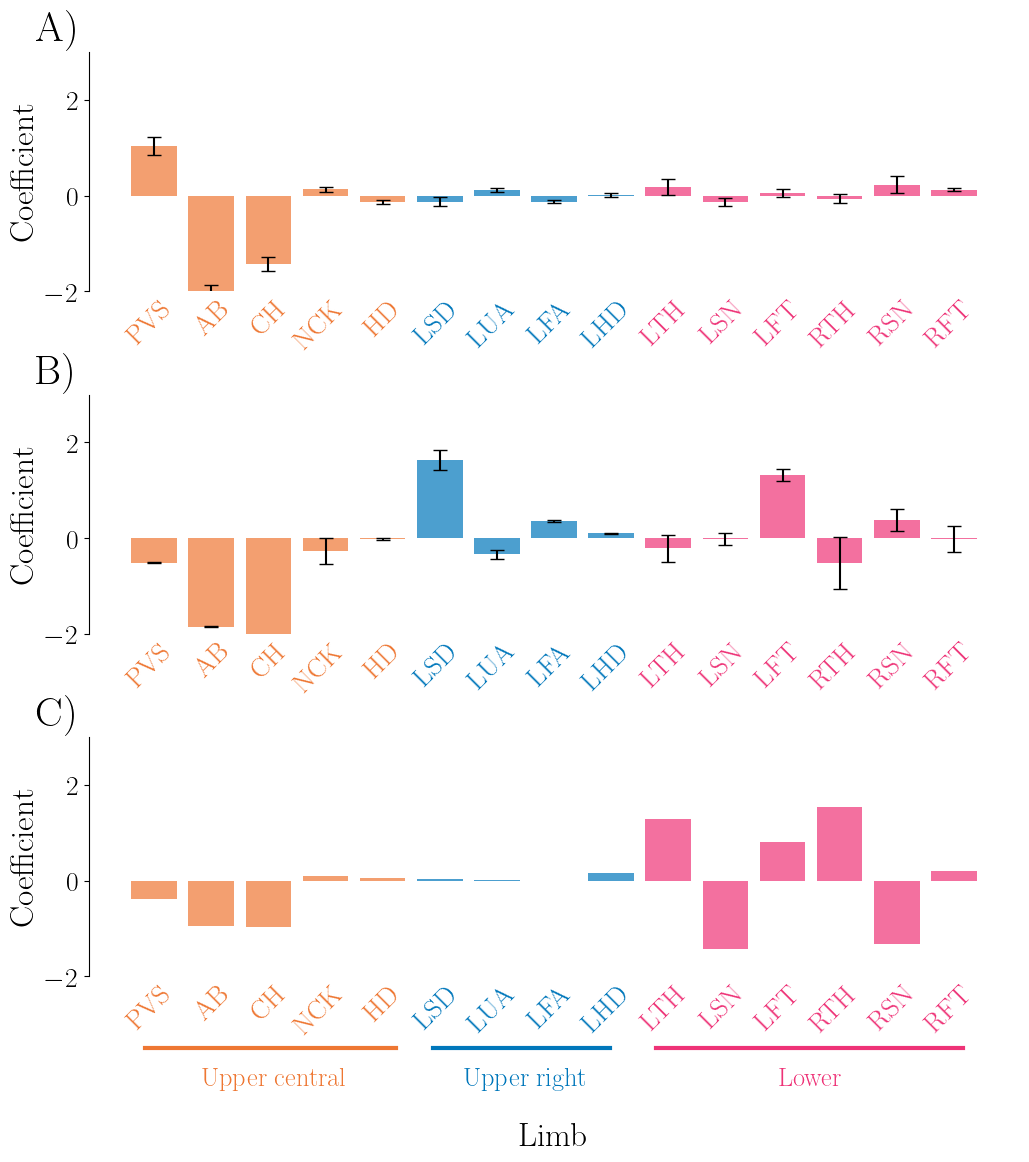

In [82]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize = (12,12))
gs = GridSpec(5,1,figure=fig,height_ratios=[0.30,0.05,0.30,0.05,0.30],width_ratios=[1])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[2, 0])
ax2 = fig.add_subplot(gs[4, 0])

cmap = tol_cset('vibrant')
plotFirstComponent(ax0)
pf.defaultPlottingConfiguration(ax0,removeXTick=True)
ax0.text(-1.7, 3*1.3, 'A)', ha='center', va='top', fontsize=30, fontweight = "bold")
ax0.set_ylim(-2,3)



plotSecondComponent(ax1)
pf.defaultPlottingConfiguration(ax1,removeXTick=True)
ax1.text(-1.7, 3 * 1.3, 'B)', ha='center', va='top', fontsize=30, fontweight = "bold")
ax1.set_ylim(-2,3)

plotThirdComponent(ax2)
pf.defaultPlottingConfiguration(ax2,removeXTick=True)
ax2.text(-1.7, 3* 1.3, 'C)', ha='center', va='top', fontsize=30, fontweight = "bold")
ax2.set_ylim(-2,3)
labelHeight = -3.5
diff = 0.4
addLines = True
if addLines:
    labelSize = 19
    ax2.axhline(y=labelHeight, xmin=0.06, xmax=0.33, color=cmap[0], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    ax2.text(2.1, labelHeight - diff, 'Upper central', ha='center', va='top', color=cmap[0], fontsize=labelSize, fontweight = "bold")

    ax2.axhline(y=labelHeight, xmin=0.37, xmax=0.56, color=cmap[1], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    ax2.text(6.5, labelHeight -diff, 'Upper right', ha='center', va='top', color=cmap[1], fontsize=labelSize, fontweight = "bold")

    ax2.axhline(y=labelHeight, xmin=0.61, xmax=0.94, color=cmap[3], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    ax2.text(11.5, labelHeight - diff, 'Lower', ha='center', va='top', color=cmap[3], fontsize=labelSize, fontweight = "bold")


    # Set limits if necessary to make room for group labels
    #ax2.set_ylim(bottom=-0.0)  # Lower the y-limit to make space for the text
    #ax2.set_xlim(-0.6,14.5)
# plotThirdComponent(ax2)
# # ax2.legend(loc = 'upper right', fontsize = 21,bbox_to_anchor=(1.25, 1.35))
# # ax1.legend(loc = 'upper right', fontsize = 21,bbox_to_anchor=(1.05, 1.35))
# # ax0.legend(loc = 'upper right', fontsize = 21,bbox_to_anchor=(1.05, 1.35))
# ax2.set_ylim(-2,3)
#ax2.text(-1.15, 1.21, 'C)', ha='center', va='top', fontsize=30, fontweight = "bold")
plt.savefig("5-ModelFCoefficients-Y.pdf",bbox_inches = "tight")



In [83]:
stabilityXLinear[6,:,:]

array([[0.70312756, 0.70312756, 0.70312756, 0.70312756, 0.70312756],
       [0.70312756, 0.70312756, 0.70312756, 0.70312756, 0.70312756],
       [0.70312756, 0.70312756, 0.70312756, 0.70312756, 0.70312756],
       [0.70312756, 0.70312756, 0.70312756, 0.70312756, 0.70312756],
       [0.70312756, 0.70312756, 0.70312756, 0.70312756, 0.70312756],
       [0.70312756, 0.70312756, 0.70312756, 0.70312756, 0.70312756],
       [0.70312756, 0.70312756, 0.70312756, 0.70312756, 0.70312756],
       [0.70312756, 0.70312756, 0.70312756, 0.70312756, 0.70312756],
       [0.70312756, 0.70312756, 0.70312756, 0.70312756, 0.70312756],
       [0.70312756, 0.70312756, 0.70312756, 0.70312756, 0.70312756],
       [0.70312756, 0.70312756, 0.70312756, 0.70312756, 0.70312756]])

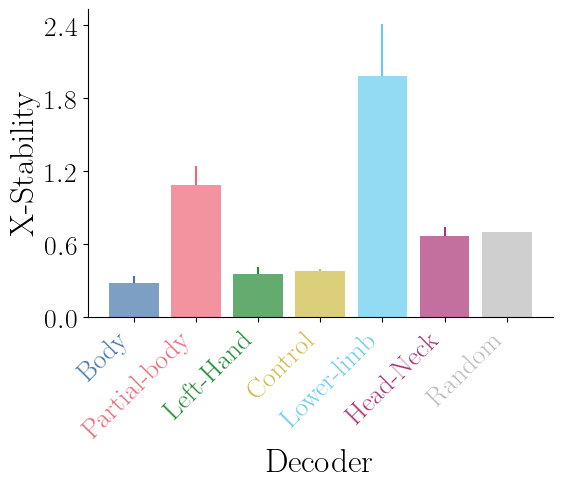

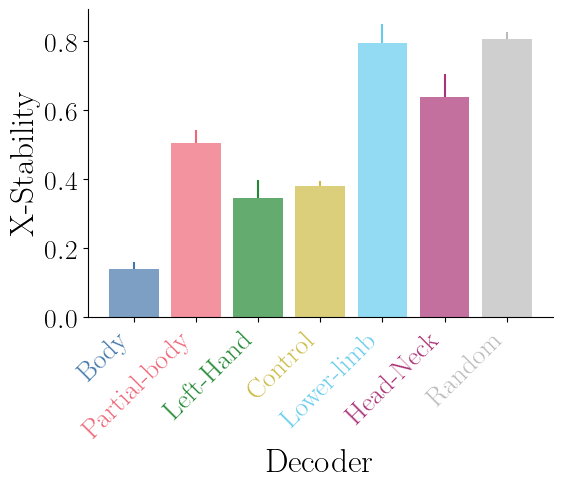

In [84]:
# Now plot bar plot with errors bars need to check the code below

# Define necessary variables
x =  range(0, 7)

stabilityXLinearAvged = np.average(stabilityXLinear,axis = 2).reshape(7,-1)
stabilityXRidgeAvged = np.average(stabilityXRidge,axis = 2).reshape(7,-1)
cmap = tol_cset('bright')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(stabilityXLinearAvged[:7,:].T,xLabel = "Decoder", yLabel = "X-Stability",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5)
# plt.yscale('log')
# plt.ylim(-2,2)

plt.show()
# Define necessary variables
x =  range(0, 7)


cmap = tol_cset('bright')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(stabilityXRidgeAvged[:7,:].T,xLabel = "Decoder", yLabel = "X-Stability",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5)
# plt.yscale('log')
# plt.ylim(-2,2)

In [85]:
stabilityXLinearAvged[6,:]

stabilityYLinearAvged = np.average(stabilityYLinear,axis = 2).reshape(7,-1)
stabilityYRidgeAvged = np.average(stabilityYRidge,axis = 2).reshape(7,-1)

In [86]:
stabilitiesAvged = np.concatenate([stabilityXLinearAvged, stabilityYLinearAvged]).reshape(2,7,11)
stabilitiesAvged = np.average(stabilitiesAvged,axis = 0)

def plotStabilities(ax2):
    x =  range(0, 7)

    cmap = tol_cset('vibrant')
    colors = list(cmap[0:7])
    print(colors)
    colors[6] = '#000000'

    pf.createErrorBarPlot(stabilitiesAvged[:,:].T,xLabel = "Decoder", yLabel = "Sensitivity",
    xTicks = x, xTickLabels = decoderLabels, ax = ax2, barColor = colors,rot = 45,width = -0.7,align='edge',colorTicks = True)
    pf.defaultPlottingConfiguration(ax2,maxYTicks = 2,removeXTick=True)
    # plt.yscale('log')
    ax.set_xticklabels(ax2.get_xticklabels(), fontweight='heavy')
    #ax.set_yticks([0,1],labels = [0,1]) 
    plt.ylim(-0.1,2)


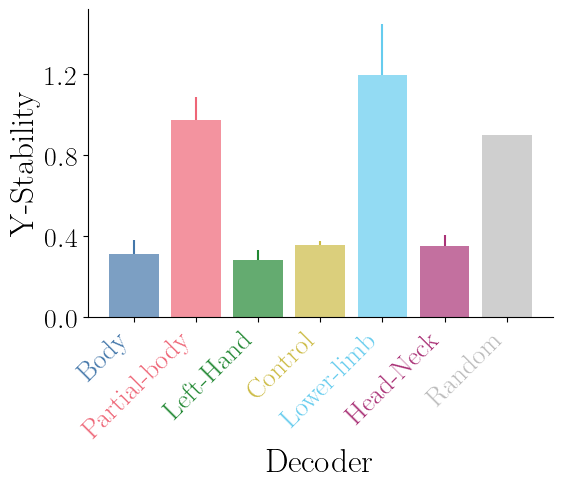

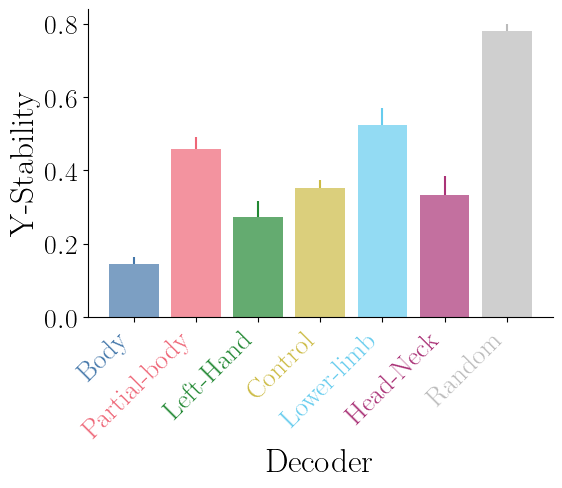

In [87]:
# Now plot bar plot with errors bars need to check the code below

# Define necessary variables
x =  range(0, 7)

stabilityYLinearAvged = np.average(stabilityYLinear,axis = 2).reshape(7,-1)
stabilityYRidgeAvged = np.average(stabilityYRidge,axis = 2).reshape(7,-1)
cmap = tol_cset('bright')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(stabilityYLinearAvged[:7,:].T,xLabel = "Decoder", yLabel = "Y-Stability",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5)
# plt.yscale('log')
# plt.ylim(-2,2)

plt.show()
# Define necessary variables
x =  range(0, 7)


cmap = tol_cset('bright')
colors = cmap[0:7]

fig = plt.figure(figsize = (6,4))
ax = plt.gca()

pf.createErrorBarPlot(stabilityYRidgeAvged[:7,:].T,xLabel = "Decoder", yLabel = "Y-Stability",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors)
pf.defaultPlottingConfiguration(ax,maxYTicks = 5)
# plt.yscale('log')
# plt.ylim(-2,2)

['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']
['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']
['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/2210764578.py:18: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/2210764578.py:18: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/2210764578.py:18: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later



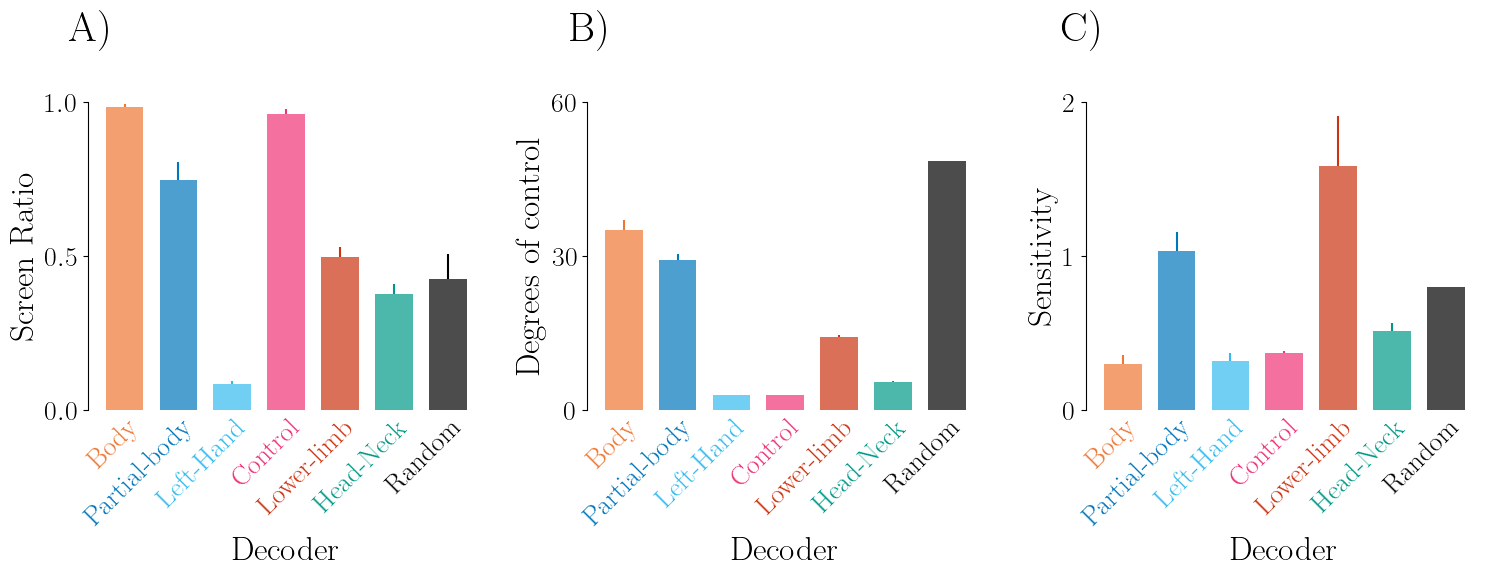

In [88]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize = (18,4))
gs = GridSpec(1,5,figure=fig,width_ratios=[0.33,0.005,0.33,0.005,0.33])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[0, 4])

plotScreenRatios(ax0)
ax0.set_ylim(0,1)
ax0.text(-1.0, 1.3, 'A)', ha='center', va='top', fontsize=30, fontweight = "bold")
plotDegreesOfFreedom(ax1)
ax1.text(-0.95, 60 + 0.3*60, 'B)', ha='center', va='top', fontsize=30, fontweight = "bold")
ax1.set_ylim(0,60)
plotStabilities(ax2)
ax2.set_ylim(0,2)
ax2.text(-1.1, 1.3 * 2, 'C)', ha='center', va='top', fontsize=30, fontweight = "bold")
plt.savefig("2.1-DecoderOpenMetrics2-others.pdf",bbox_inches = "tight")




In [89]:
random_coeff = np.random.normal(size = 2)
np.average(np.random.normal(size = 2))

0.8777267593422236

Now plot ridge against linear

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def createDoubleErrorBarPlot(arr1, arr2, xLabel, yLabel, xTicks, xTickLabels, ax=None, barColor='skyblue', offsetLabel=False, plotTopErrorOnly=True, plotSEM=True, rot=45,
                             align='center', width=0.4, colorTicks=True, ha='right'):
    """Create a Bar plot with error bars contrasting a change in arr 1 and arr 2

    Args:
        arr1: a 2D array of shape [N1,P] showing N number datapoints for P parameters (range controlled)
        arr2: a 2D array of shape [N2,P] showing N number datapoints for P parameters (non range controlled)
        xLabel: label (str) of x axes
        yLabel: label (str) of y axes
        xTicks: values of ticks to plot (1d numeric arr)
        xTickLabels: labels to associate each tick to 
        ax: axes to plot on, can be None
        barColor: color of bar, any format that matplotlib can handle
    """
    arr1 = np.nan_to_num(arr1, nan=10000)
    arr2 = np.nan_to_num(arr2, nan=10000)
    # Create a DataFrame with random data, parameters are the columns, datapoints are the rows
    data1 = pd.DataFrame(arr1, columns=[f'Variable {i+1}' for i in range(arr1.shape[1])])
    data2 = pd.DataFrame(arr2, columns=[f'Variable {i+1}' for i in range(arr2.shape[1])])

    # Calculate mean and standard deviation for each variable
    means1 = data1.mean(axis=0)
    means2 = data2.mean(axis=0)

    if plotSEM:
        std_devs1 = data1.std(axis=0) / np.sqrt(arr1.shape[0])
        std_devs2 = data2.std(axis=0) / np.sqrt(arr2.shape[0])
    else:
        std_devs1 = data1.std(axis=0)
        std_devs2 = data2.std(axis=0)

    # Create a bar plot
    if ax is None:
        plt.figure(figsize=(10, 6))
        ax = plt.gca()

    indices = np.arange(len(means1))

    # Plotting bars for arr1 and arr2 side by side
    bar_width = width / 2

    if plotTopErrorOnly:
        # reformat errors to be 2 x N
        bottomErrors1 = np.zeros(std_devs1.shape[0])
        bottomErrors2 = np.zeros(std_devs2.shape[0])

        yErrors1 = np.concatenate([bottomErrors1.reshape(-1, 1), np.asarray(std_devs1).reshape(-1, 1)], axis=1).T
        yErrors2 = np.concatenate([bottomErrors2.reshape(-1, 1), np.asarray(std_devs2).reshape(-1, 1)], axis=1).T

        ax.bar([0],[0], color='k', alpha=1, width=bar_width, label='Linear')
        ax.bar([0],[0], color='k', alpha=0.3, width=bar_width, label='Ridge')
        
        
        ax.bar(indices - bar_width / 2, means1, yerr=yErrors1, capsize=0, ecolor=barColor, color=barColor, alpha=1, width=bar_width)
        
        ax.bar(indices + bar_width / 2, means2, yerr=yErrors2, capsize=0, ecolor=barColor, color=barColor, alpha=0.3, width=bar_width)
        
    else:
        ax.bar(indices - bar_width / 2, means1, yerr=std_devs1, capsize=5, color=barColor, alpha=0.3, width=bar_width, label='Arr1')
        ax.bar(indices + bar_width / 2, means2, yerr=std_devs2, capsize=5, color=barColor, alpha=1, width=bar_width, label='Arr2')

    if offsetLabel:
        ax.set_xlabel(xLabel, labelpad=60)
    else:
        ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)

    if ha:
        ax.set_xticks(indices+0.4)
        ax.set_xticklabels(xTickLabels, rotation=rot, ha=ha)  # Rotate x-axis labels for better visibility
    else:
        ax.set_xticks(indices+0.4)
        ax.set_xticklabels(xTickLabels, rotation=rot)

    if colorTicks:
        for xtick, color in zip(ax.get_xticklabels(), barColor):
            xtick.set_color(color)
    


    
    ax.legend()



In [91]:
stabilitiesAvgedLinear = np.concatenate([stabilityXLinearAvged, stabilityYLinearAvged]).reshape(2,7,11)
stabilitiesAvgedLinear = np.average(stabilitiesAvgedLinear,axis = 0)

stabilitiesAvgedRidge = np.concatenate([stabilityXRidgeAvged, stabilityYRidgeAvged]).reshape(2,7,11)
stabilitiesAvgedRidge = np.average(stabilitiesAvgedRidge,axis = 0)

['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/3828142679.py:24: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/3828142679.py:24: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10732/3828142679.py:24: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later



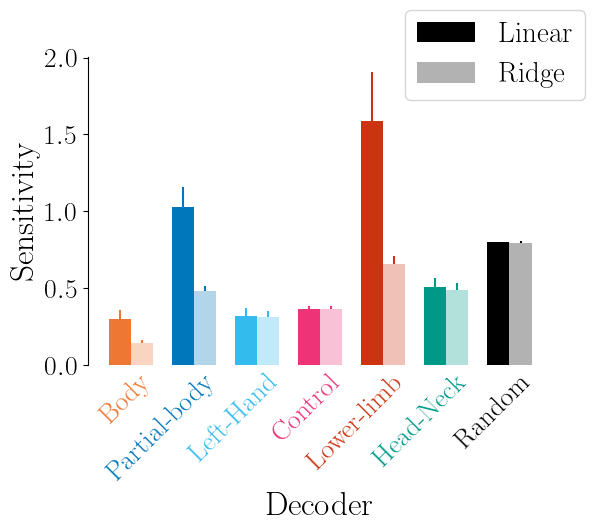

In [92]:
fig = plt.figure(figsize = (6,4))
ax = plt.gca()


x =  range(0, 7)


cmap = tol_cset('vibrant')
colors = list(cmap[0:7])
print(colors)
colors[6] = '#000000'

createDoubleErrorBarPlot(stabilitiesAvgedLinear[:7,:].T,stabilitiesAvgedRidge[:7,:].T,xLabel = "Decoder", yLabel = "Sensitivity",
xTicks = x, xTickLabels = decoderLabels, ax = ax, barColor = colors,rot = 45,width = 0.7,align='edge',colorTicks = True)


pf.defaultPlottingConfiguration(ax,maxYTicks = 2,removeXTick=True,legendSize=20)

ax.legend(loc = 'upper right', fontsize = 21,bbox_to_anchor=(1.1, 1.2))
ax.set_xticklabels(ax.get_xticklabels(), fontweight='heavy')
#ax.set_yticks([0,1],labels = [0,1]) 
plt.yscale('linear')
#plt.ylim(-2,2)
plt.savefig("FurtherWork-ridgeRegression.pdf",bbox_inches = "tight")
plt.show()